In [1]:
import pandas as pd
import os
import yaml

import os
os.environ['PATH'] += ":/vast/palmer/apps/avx2/software/texlive/20220321-GCC-10.2.0/bin/x86_64-linux/"

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

from src.results_utils import get_experiment_config, get_sweep_variables, get_all_results_exp, get_best_results_test, get_results_to_plot, add_hline

## alternate font/graph format
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', weight='heavy')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('axes', labelsize='x-large')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

cp = sns.color_palette("hls",12)
cp

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6312, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.6312),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5688000000000001, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999),
 (0.86, 0.33999999999999997, 0.5688000000000001)]

# Quantitative Evaluations

## Distance matrix direct comparison

### General sweep

In [3]:
model_name = "heat_geo"
run_name = "2023-05-07_11-37-24" #"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
heat_geo_sweep_variables = get_sweep_variables(exp_config)
df_heat_geo = get_all_results_exp(model_name, run_name, heat_geo_sweep_variables)

model_name = "heat_phate"
run_name = "2023-05-06_21-50-10" #"2023-04-22_20-54-37"
exp_config = get_experiment_config(model_name, run_name)
heat_phate_sweep_variables = get_sweep_variables(exp_config)
df_heat_phate = get_all_results_exp(model_name, run_name, heat_phate_sweep_variables)

model_name = "phate"
run_name = "2023-05-06_21-50-10" #"2023-04-22_20-54-37"
exp_config = get_experiment_config(model_name, run_name)
phate_sweep_variables = get_sweep_variables(exp_config)
df_phate = get_all_results_exp(model_name, run_name, phate_sweep_variables)

model_name = "diff_map"
run_name = "2023-05-06_21-50-10" #"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
diff_map_sweep_variables = get_sweep_variables(exp_config)
df_diff_map = get_all_results_exp(model_name, run_name, diff_map_sweep_variables)

model_name = "shortest_path"
run_name = "2023-05-06_21-50-10"#"2023-04-24_19-36-55"
exp_config = get_experiment_config(model_name, run_name)
shortest_path_sweep_variables = get_sweep_variables(exp_config)
df_shortest_path = get_all_results_exp(model_name, run_name, shortest_path_sweep_variables)

model_name = "rand_geo"
run_name = "2023-05-06_21-50-10"#"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
rand_geo_sweep_variables = get_sweep_variables(exp_config)
df_rand_geo = get_all_results_exp(model_name, run_name, rand_geo_sweep_variables)

No PKL file found for shortest_path 2023-05-06_21-50-10 21
Config for this run : 
{'original_work_dir': '${hydra:runtime.cwd}', 'seed': None, 'n_seeds': 10, 'name': 'shortest_path', 'dataset_name': 'tree_high', 'data': {'_target_': 'src.dataset.TreePhate', '_partial_': True, 'n_dim': 30, 'n_points': 500, 'n_branch': 5, 'manifold_noise': 1, 'knn_geodesic': 10}, 'model_name': 'shortest_path', 'model': {'_target_': 'src.embedding.ShortestPath', 'knn': 5, 'decay': 40, 'n_pca': False, 'anisotropy': 0, 'method': 'auto', 'emb_dim': 2}}
No PKL file found for shortest_path 2023-05-06_21-50-10 6
Config for this run : 
{'original_work_dir': '${hydra:runtime.cwd}', 'seed': None, 'n_seeds': 10, 'name': 'shortest_path', 'dataset_name': 'tree', 'data': {'_target_': 'src.dataset.TreePhate', '_partial_': True, 'n_dim': 10, 'n_points': 500, 'n_branch': 5, 'manifold_noise': 1, 'knn_geodesic': 10}, 'model_name': 'shortest_path', 'model': {'_target_': 'src.embedding.ShortestPath', 'knn': 5, 'decay': 40, 'n

#### Plotting

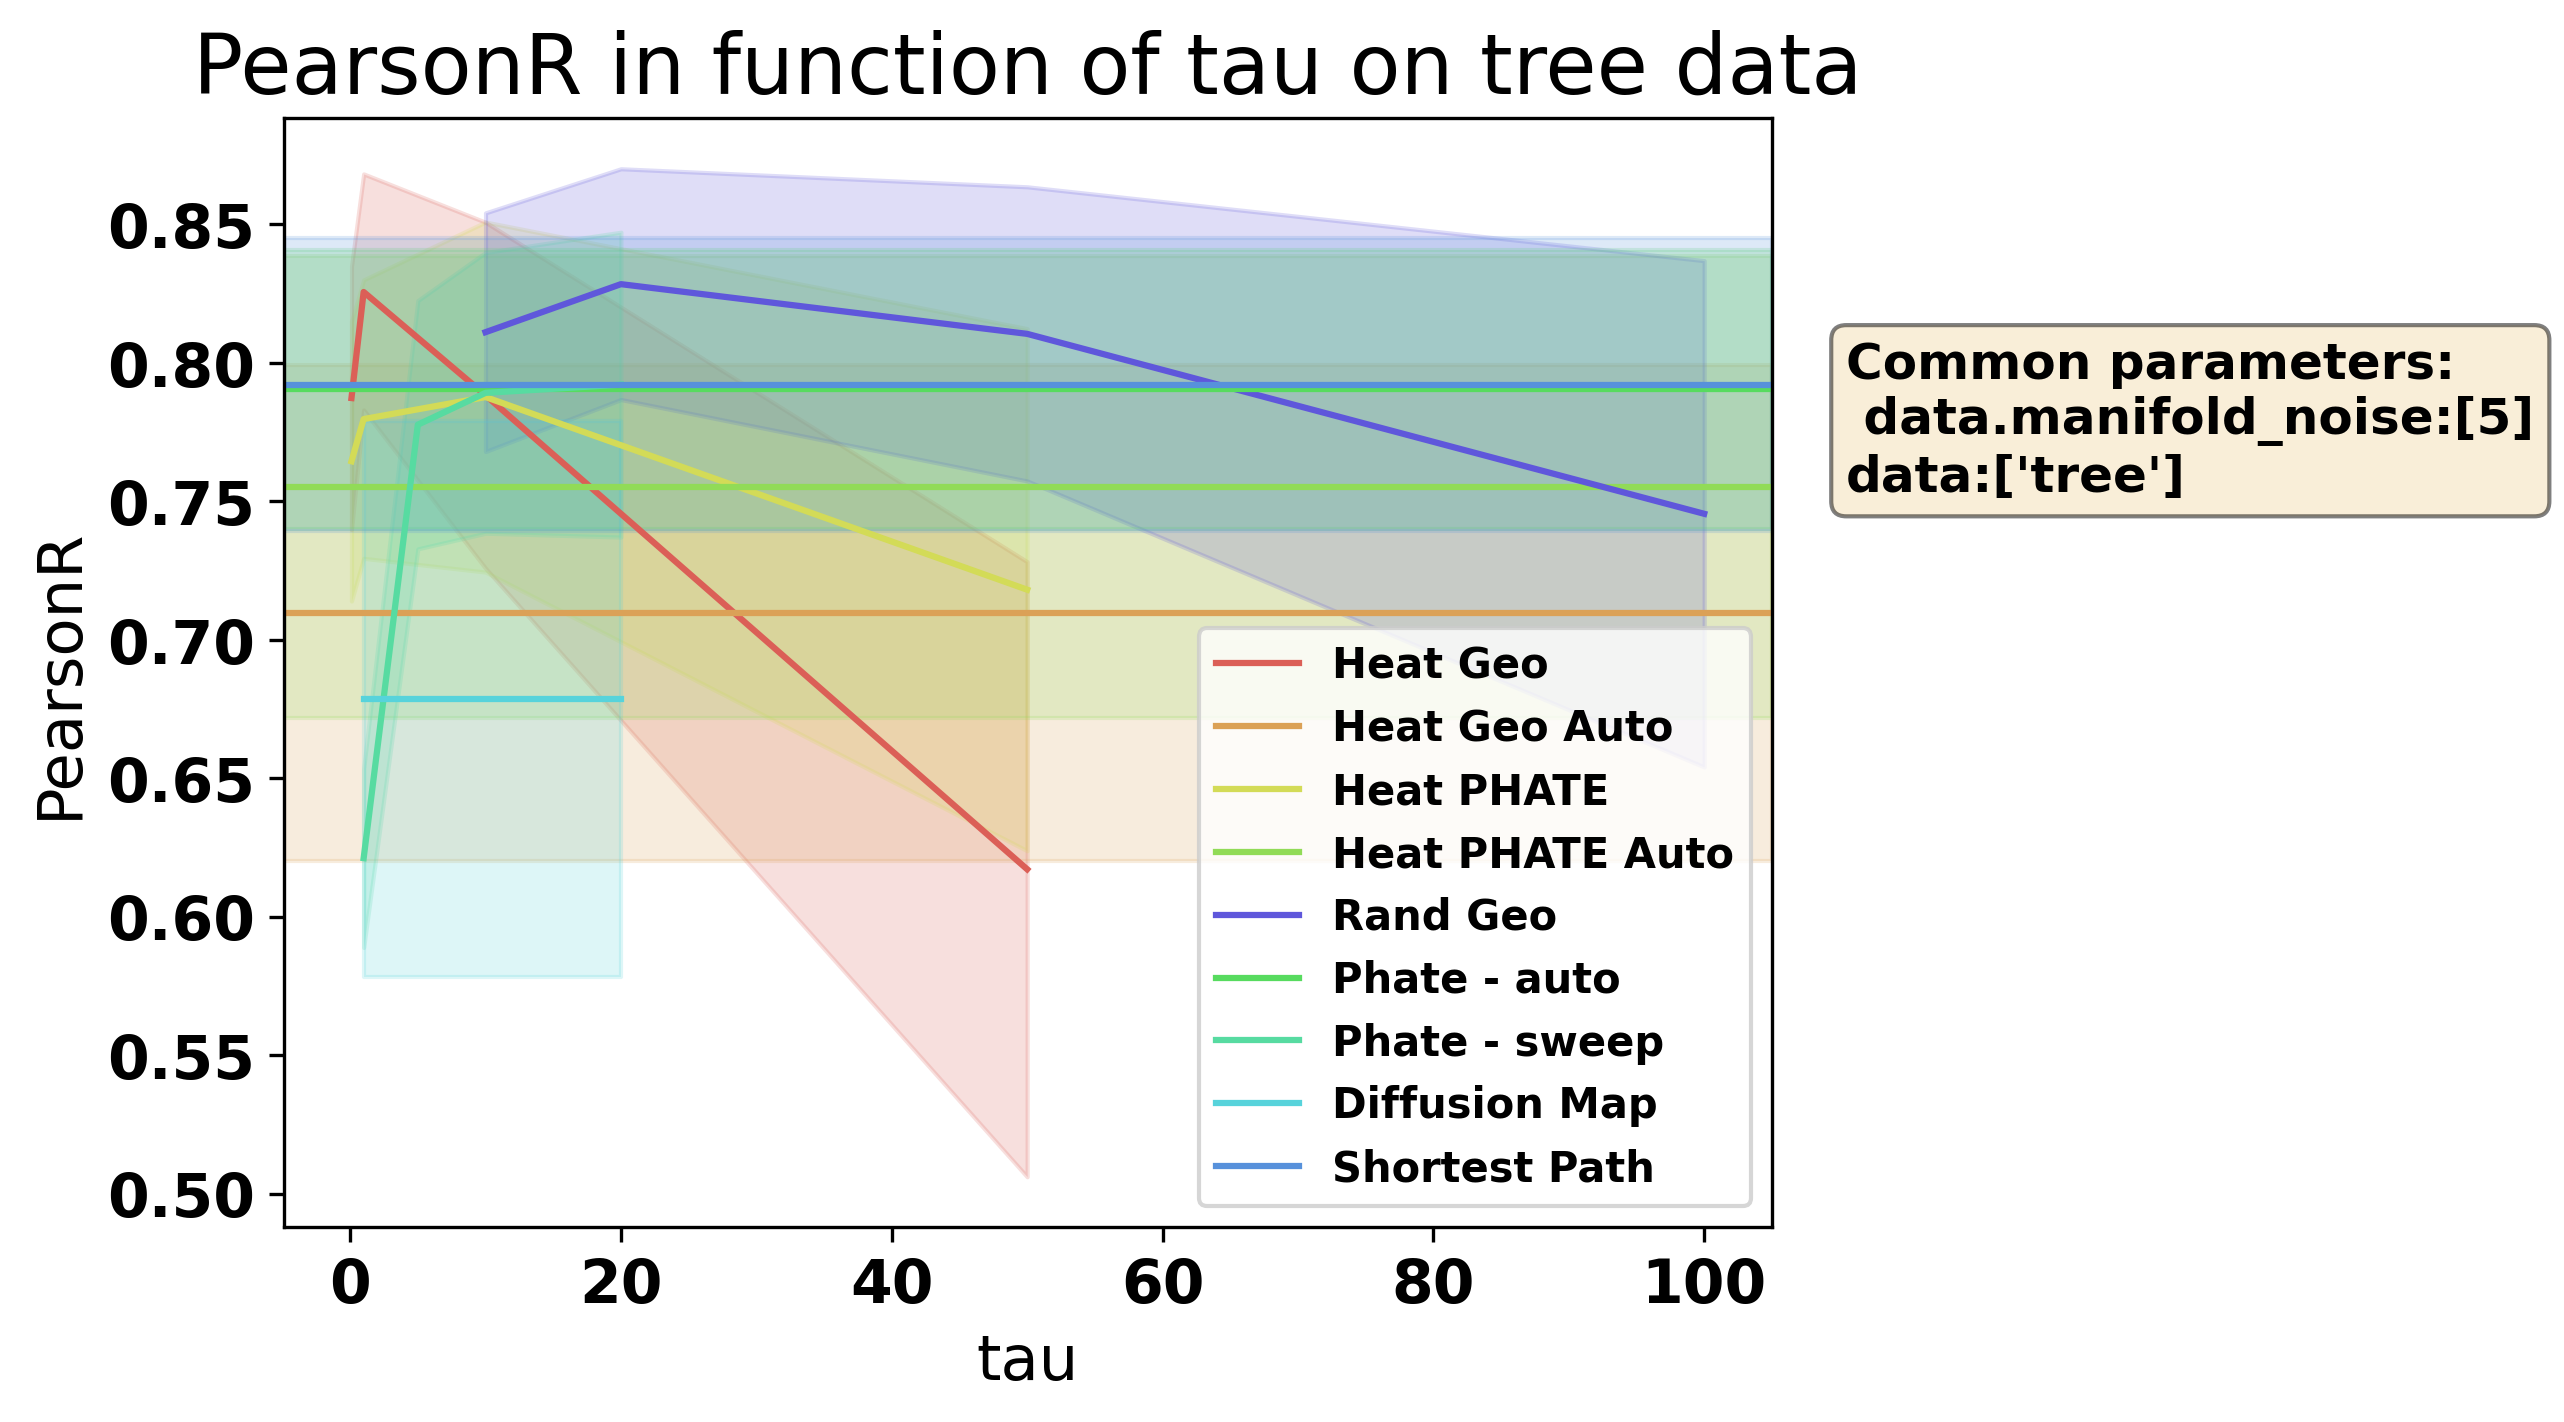

In [12]:

# --------- COMMON PARAMETERS -----------
metric = "PearsonR"
xcol = "model.tau"
xlabel = "tau"
data = "tree"

common_constraints = {"data.manifold_noise":[5],
                    "data": [data]}
# ---------------------------------------

# ----------- HEAT GEO CONFIG ------------

color = cp[0]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_heat_geo
sweep_variables = heat_geo_sweep_variables

constraints = {"model.tau" : np.array([ f for f in heat_geo_sweep_variables["model.tau"] if f != "auto"]).astype(float),
                "model.filter_method": ["euler"],
                "model.lap_type":["combinatorial"],
                "model.knn":[10],
                "model.order":[30],
                }

label = "Heat Geo"

heat_geo_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ----------- HEAT GEO CONFIG  AUTO------------

color = cp[1]
no_sweep = True #set to True if this variable was not swept over in this experiment.
df_results = df_heat_geo
sweep_variables = heat_geo_sweep_variables

constraints = {"model.tau" : ["auto"],
                "model.filter_method": ["euler"],
                "model.lap_type":["combinatorial"],
                "model.knn":[10],
                "model.order":[30],
                }

label = "Heat Geo Auto"

heat_geo_auto_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# ------------ HEAT PHATE CONFIG ------------
color = cp[2]
no_sweep = False
df_results = df_heat_phate
sweep_variables = heat_phate_sweep_variables
constraints = {"model.tau" : np.array([ f for f in heat_phate_sweep_variables["model.tau"] if f != "auto"]).astype(float),
                "model.filter_method": ["euler"],
                "model.lap_type":["combinatorial"],
                "model.knn":[10],
                "model.order":[15]}

label = "Heat PHATE"

heat_phate_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ------------ HEAT PHATE CONFIG AUTO------------
color = cp[3]
no_sweep = True
df_results = df_heat_phate
sweep_variables = heat_phate_sweep_variables
constraints = {"model.tau" : ["auto"],
                "model.filter_method": ["euler"],
                "model.lap_type":["combinatorial"],
                "model.knn":[10],
                "model.order":[30]}

label = "Heat PHATE Auto"

heat_phate_auto_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ------------ PHATE AUTO CONFIG ------------

color = cp[4]
no_sweep = True
df_results = df_phate
sweep_variables = phate_sweep_variables
constraints = {"model.n_pca" : [50], "model.tau" : ["auto"]}

label = "Phate - auto"

phate_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

#-  --------------------------------------

# ------------ PHATE SWEEP CONFIG ------------

color = cp[5]
no_sweep = False
df_results = df_phate
sweep_variables = phate_sweep_variables
constraints = {"model.n_pca" : [50], 
               "model.tau" : np.array([ f for f in phate_sweep_variables["model.tau"] if f != "auto"]).astype(float)}

label = "Phate - sweep"

phate_sweep_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

#-  --------------------------------------


# -------------- DIFF MAP CONFIG ------------
color = cp[6]
no_sweep = False
df_results = df_diff_map
sweep_variables = diff_map_sweep_variables
constraints = {"model.tau" : np.array(diff_map_sweep_variables["model.tau"]).astype(float),
                "model.knn" : [15]}

label = "Diffusion Map"

diff_map_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# ------------- Shortest Path CONFIG --------------
color = cp[7]
no_sweep = True
df_results = df_shortest_path
sweep_variables = shortest_path_sweep_variables
constraints = {"model.knn" : [10]}

label = "Shortest Path"
shortest_path_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ----------- HEAT GEO CONFIG ------------

color = cp[8]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_rand_geo
sweep_variables = rand_geo_sweep_variables

constraints = {"model.tau" : np.array(rand_geo_sweep_variables["model.tau"]).astype(float),
                "model.filter_method": ["symmetric"],
                "model.lap_type":["combinatorial"],
                "model.knn":[10],
                "model.order":[15],
                }

label = "Rand Geo"

rand_geo_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# PLOTTING 

configs = [heat_geo_config, heat_geo_auto_config, heat_phate_config, heat_phate_auto_config, rand_geo_config, phate_config, phate_sweep_config, diff_map_config, shortest_path_config]

fig, ax = plt.subplots()

for config in configs:

    constraints_ = {**config["constraints"], **common_constraints}

    m_df, s_df = get_results_to_plot(config["df_results"], config["sweep_variables"], constraints = constraints_, metric = metric)

    if config["no_sweep"]: # Only one measurement to plot
        ax.axhline(m_df[metric].item(), label = config["label"], color = config["color"])
        ax.axhspan(m_df[metric].item()-s_df[metric].item(),m_df[metric].item()+s_df[metric].item(), alpha= 0.2, color = config["color"])
    else:
        ax.plot(m_df[xcol],m_df[metric], label = config["label"], color = config["color"])
        ax.fill_between(m_df[xcol].astype(float), m_df[metric] - s_df[metric], m_df[metric] + s_df[metric], alpha=0.2, color = config["color"])

ax.legend()
ax.set_title(f"{metric} in function of {xlabel} on {data} data", fontsize = 20)
ax.set_xlabel(xlabel, fontsize = 15)
ax.set_ylabel(metric, fontsize = 15)

textstr = "\n".join([f"{k}:{v}" for k,v in common_constraints.items()])
textstr = "Common parameters: \n " + textstr
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 0.8, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
plt.show() 


#### Latex tables

In [13]:
# this is just a fix because the parameters were off in the sweep - to remove for further sweeps
df_heat_geo.loc[df_heat_geo["data"].str.contains("tree"),"data.manifold_noise"] = 10 *df_heat_geo.loc[df_heat_geo["data"].str.contains("tree"),"data.manifold_noise"] 

In [14]:
metrics = [("PearsonR",max),("SpearmanR",max),("Norm Fro N2",min),("Norm inf N2",min),("time(s)",min)]
#metrics = [("Norm Fro N2",min)]

df_res_metrics = []
df_hp_dict = {}
for metric, best_order in metrics:
    df_list = []
    df_hp_dict[metric] = {}

    for df, sweep_variables, method_name in [(df_heat_phate, heat_phate_sweep_variables, "Heat-PHATE"),
                                            (df_phate, phate_sweep_variables, "PHATE"),
                                            (df_heat_geo, heat_geo_sweep_variables, "Heat-Geo"),
                                            (df_rand_geo, rand_geo_sweep_variables, "Rand-Geo"),
                                            (df_diff_map, diff_map_sweep_variables, "Diffusion Map"),
                                            (df_shortest_path, shortest_path_sweep_variables, "Shortest Path")]:
        best_df, best_with_hp = get_best_results_test(df,metric, sweep_variables, best_order) #best with hp is the val error with hyper-parameters
        best_df["Method"] = method_name
        df_list.append(best_df[["data","data.manifold_noise","Method",metric]])
        df_hp_dict[metric][method_name] = best_with_hp

    df_res = pd.concat(df_list).copy()
    df_res = df_res.reset_index(drop = True)

    ### Bold the best results :

    df_res["mean"] = df_res[metric].apply(lambda x: float(x.split(" \pm ")[0][1:]))

    idx = df_res.groupby(["data","data.manifold_noise"])["mean"].transform(best_order) == df_res["mean"]

    for i,id in zip(list(idx.index),list(idx.values)):
        if id:
            df_res.loc[i,metric] = "$\mathbf{" + df_res.loc[i,metric][1:-1] + "}$"

    df_res = df_res.drop(columns = ["mean"])


    # Append the results for this metric 
    df_res_metrics.append(df_res)

from functools import reduce 
df_all_metrics = reduce(lambda x,y : pd.merge(x,y, on = ["Method","data","data.manifold_noise"]),df_res_metrics)
df_all_metrics.sort_values(by = ["data","data.manifold_noise","Method"],inplace=True)


df_all_metrics.rename(columns = {"data.manifold_noise":"Noise level"}, inplace = True)
df_all_metrics["data"] = df_all_metrics["data"].apply(lambda x: x.replace("_"," ").capitalize())

df_all_metrics = df_all_metrics.reset_index(drop = True)

In [21]:
#This is some code to remove some outliers (should not be necessary anymore in the following runs)
df_all_metrics.drop(df_all_metrics.loc[(df_all_metrics["data"].str.contains("roll")) & (df_all_metrics["Noise level"]>=5)].index, inplace = True)
df_all_metrics.drop(df_all_metrics.loc[(df_all_metrics["data"].str.contains("Tree")) & (df_all_metrics["Noise level"]<1)].index, inplace = True)

In [22]:
df_latex = df_all_metrics.to_latex(escape = False, index = False)

split_every_n = 6
for split_idx in range(len(df_all_metrics)// split_every_n):
    df_latex = add_hline(df_latex, split_every_n*(split_idx+1) + split_idx)

print(df_latex)

\begin{tabular}{lrllllll}
\toprule
                data &  Noise level &        Method &                   PearsonR &                  SpearmanR &                Norm Fro N2 &                Norm inf N2 &                    time(s) \\
\midrule
          Swiss roll &          0.1 & Diffusion Map &           $0.974 \pm 0.01$ &          $0.983 \pm 0.007$ &            $0.018 \pm 0.0$ &            $0.026 \pm 0.0$ &         $10.585 \pm 0.033$ \\
          Swiss roll &          0.1 &      Heat-Geo &          $0.992 \pm 0.003$ &          $0.995 \pm 0.002$ &            $0.002 \pm 0.0$ &            $0.003 \pm 0.0$ &          $6.603 \pm 0.124$ \\
          Swiss roll &          0.1 &    Heat-PHATE &           $0.99 \pm 0.002$ &          $0.997 \pm 0.001$ &          $0.079 \pm 0.002$ &            $0.1 \pm 0.003$ &         $11.152 \pm 0.097$ \\
          Swiss roll &          0.1 &         PHATE &          $0.621 \pm 0.006$ &            $0.58 \pm 0.01$ &            $0.022 \pm 0.0$ &            $0.0

#### Investigating the best hyper-parameters for each method

In [28]:
print(df_hp_dict["PearsonR"].keys())

dict_keys(['Heat-PHATE', 'PHATE', 'Heat-Geo', 'Rand-Geo', 'Diffusion Map', 'Shortest Path'])


In [32]:
pd.set_option('display.max_rows', 100)
df_hp_dict["Norm Fro N2"]["Diffusion Map"]

data  data.manifold_noise  model.knn  model.tau  \
0              swiss_roll                  0.1          5          1   
12             swiss_roll                  0.5          5          1   
28             swiss_roll                  1.0         10          1   
36             swiss_roll                  5.0          5          1   
48             swiss_roll                 10.0          5          1   
64        swiss_roll_high                  0.1         10          1   
76        swiss_roll_high                  0.5         10          1   
88        swiss_roll_high                  1.0         10          1   
96        swiss_roll_high                  5.0          5          1   
108       swiss_roll_high                 10.0          5          1   
120  swiss_roll_very_high                  0.1          5          1   
140  swiss_roll_very_high                  0.5         15          1   
144  swiss_roll_very_high                  1.0          5          1   
156  swiss_roll_very_high                  5.0          5          1   
168  swiss_roll_very_high                 10.0          5          1   
188                  tree                  0.1         15          1   
196                  tree                  0.5         10          1   
212                  tree                  1.0         15          1   
224                  tree                  5.0         15          1   
228                  tree                 10.0          5          1   
244             tree_high                  0.1         10          1   
260             tree_high                  0.5         15          1   
268             tree_high                  1.0         10          1   
280             tree_high                  5.0         10          1   
288             tree_high                 10.0          5          1   

     Norm Fro N2  
0       0.018471  
12      0.018471  
28      0.018475  
36      0.018476  
48      0.018476  
64      0.018471  
76      0.018471  
88      0.018475  
96      0.018476  
108     0.018477  
120     0.018471  
140     0.018471  
144     0.018477  
156     0.018478  
168     0.018480  
188     0.121914  
196     0.121914  
212     0.121914  
224     0.121915  
228     0.121915  
244     0.278917  
260     0.278917  
268     0.278917  
280     0.278917  
288     0.278919

### Plots for different parameters

#### Tau

In [3]:
model_name = "heat_geo_tau_sweep"
run_name = "2023-05-07_20-31-49" #"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
heat_geo_sweep_variables = get_sweep_variables(exp_config)
df_heat_geo = get_all_results_exp(model_name, run_name, heat_geo_sweep_variables)

model_name = "heat_phate_tau_sweep"
run_name = "2023-05-07_20-31-30" #"2023-04-22_20-54-37"
exp_config = get_experiment_config(model_name, run_name)
heat_phate_sweep_variables = get_sweep_variables(exp_config)
df_heat_phate = get_all_results_exp(model_name, run_name, heat_phate_sweep_variables)

model_name = "phate_tau_sweep"
run_name = "2023-05-07_20-31-30" #"2023-04-22_20-54-37"
exp_config = get_experiment_config(model_name, run_name)
phate_sweep_variables = get_sweep_variables(exp_config)
df_phate = get_all_results_exp(model_name, run_name, phate_sweep_variables)

model_name = "diff_map_tau_sweep"
run_name = "2023-05-08_11-48-31" #"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
diff_map_sweep_variables = get_sweep_variables(exp_config)
df_diff_map = get_all_results_exp(model_name, run_name, diff_map_sweep_variables)

model_name = "rand_geo_tau_sweep"
run_name = "2023-05-07_20-31-49"#"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
rand_geo_sweep_variables = get_sweep_variables(exp_config)
df_rand_geo = get_all_results_exp(model_name, run_name, rand_geo_sweep_variables)

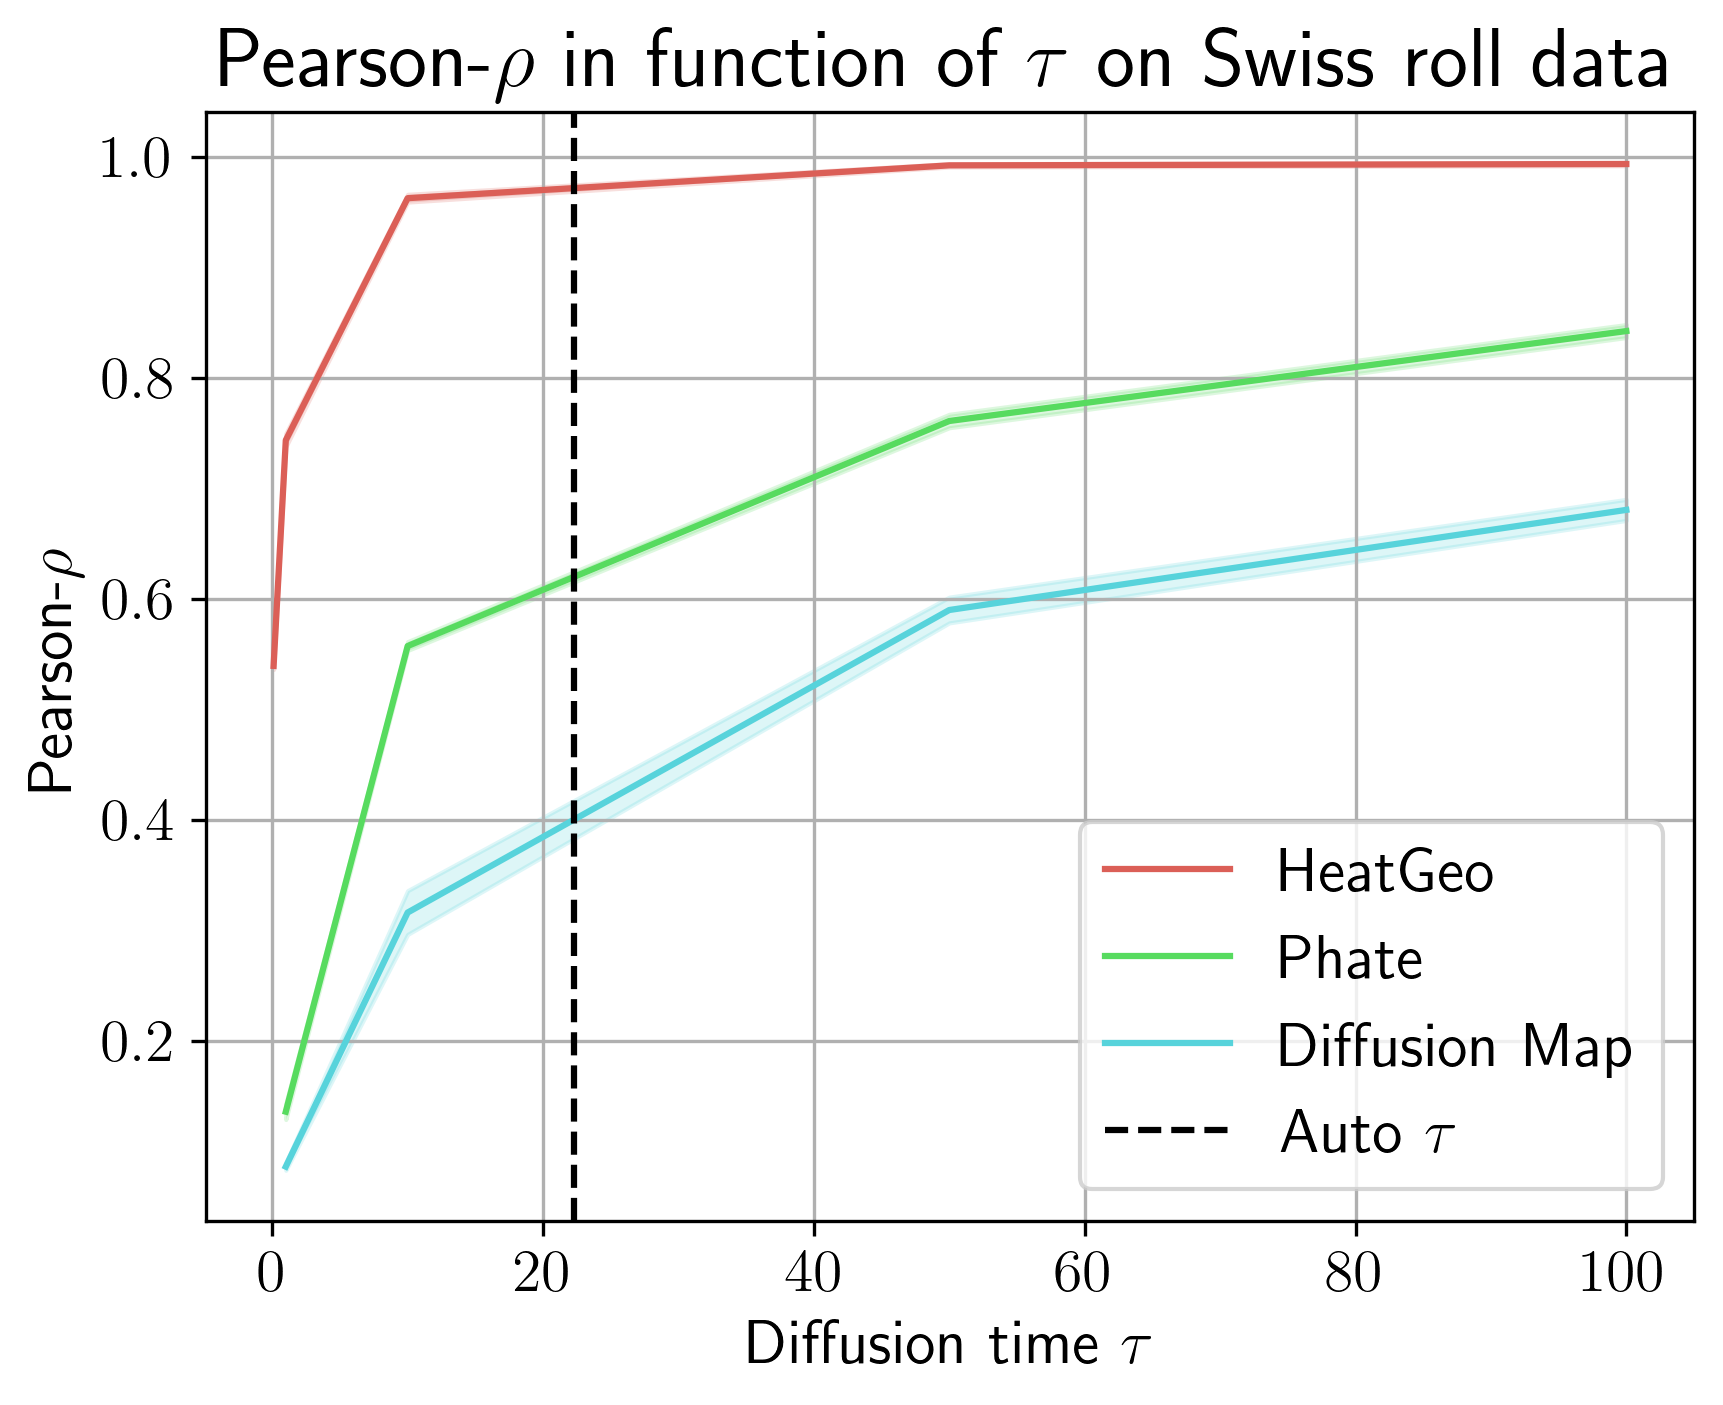

In [4]:
color_dict = {"heat_geo":cp[0],
              "heat_geo_auto":cp[1],
              "heat_phate":cp[2],
              "heat_phate_auto":cp[3],
              "phate":cp[4],
              "phate_auto":cp[5],
              "diff_map":cp[6],
              "rand_geo":cp[7],
              "shortest_path":cp[8]  }



# --------- COMMON PARAMETERS -----------
metric = "PearsonR"
xcol = "model.tau"
xlabel = r"$\tau$"
data = "swiss_roll"


common_constraints = {"data.manifold_noise":[0.5],
                    "data": [data]}

data_str_dict = {"swiss_roll":"Swiss roll", "tree": "Tree"}
metric_str_dict = {"PearsonR":r"Pearson-$\rho$", "SpearmanR":r"Spearman-$\rho$", "Norm Fro N2": r"$\lVert \cdot \rVert_F$"}

common_constraints_str = {"Dataset": data_str_dict[common_constraints["data"][0]],
                            "Noise":common_constraints["data.manifold_noise"][0]
                        }


# ---------------------------------------

# ----------- HEAT GEO CONFIG ------------

color = color_dict["heat_geo"]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_heat_geo
sweep_variables = heat_geo_sweep_variables

constraints = {"model.tau" : np.array([ f for f in heat_geo_sweep_variables["model.tau"] if f != "auto"]).astype(float),
                #"model.filter_method": ["euler"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[30],
                }

label = "HeatGeo"

heat_geo_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ----------- HEAT GEO CONFIG  AUTO------------

color = color_dict["heat_geo_auto"]
no_sweep = True #set to True if this variable was not swept over in this experiment.
df_results = df_heat_geo
sweep_variables = heat_geo_sweep_variables

constraints = {"model.tau" : ["auto"],
                #"model.filter_method": ["euler"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[30],
                }

label = "Heat Geo Auto"

heat_geo_auto_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# ------------ HEAT PHATE CONFIG ------------
color = color_dict["heat_phate"]
no_sweep = False
df_results = df_heat_phate
sweep_variables = heat_phate_sweep_variables
constraints = {"model.tau" : np.array([ f for f in heat_phate_sweep_variables["model.tau"] if f != "auto"]).astype(float),
                #"model.filter_method": ["euler"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[15]
                }

label = "Heat PHATE"

heat_phate_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ------------ HEAT PHATE CONFIG AUTO------------
color = color_dict["heat_phate_auto"]
no_sweep = True
df_results = df_heat_phate
sweep_variables = heat_phate_sweep_variables
constraints = {"model.tau" : ["auto"],
                #"model.filter_method": ["euler"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[30]
                }

label = "Heat PHATE Auto"

heat_phate_auto_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ------------ PHATE AUTO CONFIG ------------

color = color_dict["phate_auto"]
no_sweep = True
df_results = df_phate
sweep_variables = phate_sweep_variables
constraints = {#"model.n_pca" : [50], 
               "model.tau" : ["auto"]}

label = "Phate - auto"

phate_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

#-  --------------------------------------

# ------------ PHATE SWEEP CONFIG ------------

color = color_dict["phate"]
no_sweep = False
df_results = df_phate
sweep_variables = phate_sweep_variables
constraints = {#"model.n_pca" : [50], 
               "model.tau" : np.array([ f for f in phate_sweep_variables["model.tau"] if f != "auto"]).astype(float)}

label = "Phate"

phate_sweep_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

#-  --------------------------------------


# -------------- DIFF MAP CONFIG ------------
color = color_dict["diff_map"]
no_sweep = False
df_results = df_diff_map
sweep_variables = diff_map_sweep_variables
constraints = {"model.tau" : np.array(diff_map_sweep_variables["model.tau"]).astype(float),
                #"model.knn" : [15]
                }

label = "Diffusion Map"

diff_map_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ----------- RAND GEO CONFIG ------------

color = color_dict["rand_geo"]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_rand_geo
sweep_variables = rand_geo_sweep_variables

constraints = {"model.tau" : np.array(rand_geo_sweep_variables["model.tau"]).astype(float),
                #"model.filter_method": ["symmetric"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[15],
                }

label = "Rand Geo"

rand_geo_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# PLOTTING 

#configs = [heat_geo_config, heat_geo_auto_config, heat_phate_config, heat_phate_auto_config, rand_geo_config, phate_config, phate_sweep_config, diff_map_config]
configs = [heat_geo_config, phate_sweep_config, diff_map_config]

fig, ax = plt.subplots()

for config in configs:

    constraints_ = {**config["constraints"], **common_constraints}

    m_df, s_df = get_results_to_plot(config["df_results"], config["sweep_variables"], constraints = constraints_, metric = metric)

    if config["no_sweep"]: # Only one measurement to plot
        ax.axhline(m_df[metric].item(), label = config["label"], color = config["color"])
        ax.axhspan(m_df[metric].item()-s_df[metric].item(),m_df[metric].item()+s_df[metric].item(), alpha= 0.2, color = config["color"])
    else:
        ax.plot(m_df[xcol],m_df[metric], label = config["label"], color = config["color"])
        ax.fill_between(m_df[xcol].astype(float), m_df[metric] - s_df[metric], m_df[metric] + s_df[metric], alpha=0.2, color = config["color"])

ax.axvline(22.26, color = "black", linestyle = "--", label = r"Auto $\tau$")
ax.legend(fontsize=15)
ax.set_title(f"{metric_str_dict[metric]} in function of {xlabel} on {data_str_dict[data]} data", fontsize = 20)
ax.set_xlabel("Diffusion time " + xlabel, fontsize = 15)
ax.set_ylabel(metric_str_dict[metric], fontsize = 15)

textstr = "\n".join([f"{k}:{v}" for k,v in common_constraints_str.items()])
textstr = "Configuration: \n " + textstr
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax.text(1.05, 0.8, textstr, transform=ax.transAxes, fontsize=12,
#        verticalalignment='top', bbox=props)
plt.grid()
plt.show()

#### KNN

In [4]:
model_name = "heat_geo_knn_sweep"
run_name = "2023-05-09_12-57-18" #"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
heat_geo_sweep_variables = get_sweep_variables(exp_config)
df_heat_geo = get_all_results_exp(model_name, run_name, heat_geo_sweep_variables)

model_name = "heat_phate_knn_sweep"
run_name = "2023-05-07_20-39-41" #"2023-04-22_20-54-37"
exp_config = get_experiment_config(model_name, run_name)
heat_phate_sweep_variables = get_sweep_variables(exp_config)
df_heat_phate = get_all_results_exp(model_name, run_name, heat_phate_sweep_variables)

model_name = "phate_knn_sweep"
run_name = "2023-05-07_20-40-05" #"2023-04-22_20-54-37"
exp_config = get_experiment_config(model_name, run_name)
phate_sweep_variables = get_sweep_variables(exp_config)
df_phate = get_all_results_exp(model_name, run_name, phate_sweep_variables)

model_name = "diff_map_knn_sweep"
run_name = "2023-05-08_12-17-07" #"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
diff_map_sweep_variables = get_sweep_variables(exp_config)
df_diff_map = get_all_results_exp(model_name, run_name, diff_map_sweep_variables)

model_name = "rand_geo_knn_sweep"
run_name = "2023-05-07_20-40-05"#"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
rand_geo_sweep_variables = get_sweep_variables(exp_config)
df_rand_geo = get_all_results_exp(model_name, run_name, rand_geo_sweep_variables)

model_name = "shortest_path_knn_sweep"
run_name = "2023-05-09_12-57-18"#"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
shortest_path_sweep_variables = get_sweep_variables(exp_config)
df_shortest_path = get_all_results_exp(model_name, run_name, shortest_path_sweep_variables)

No PKL file found for shortest_path_knn_sweep 2023-05-09_12-57-18 65
Config for this run : 
{'original_work_dir': '${hydra:runtime.cwd}', 'seed': None, 'n_seeds': 10, 'name': 'shortest_path_knn_sweep', 'dataset_name': 'swiss_roll_very_high', 'data': {'_target_': 'src.dataset.SwissRollStretch', '_partial_': True, 'n_points': 200, 'manifold_noise': 0.5, 'width': 5, 'rotate': True, 'rotate_dim': 50}, 'model_name': 'shortest_path', 'model': {'_target_': 'src.embedding.ShortestPath', 'knn': 5, 'decay': 40, 'n_pca': False, 'anisotropy': 0, 'method': 'auto', 'emb_dim': 2, 'graph_type': 'knn'}}
No PKL file found for shortest_path_knn_sweep 2023-05-09_12-57-18 60
Config for this run : 
{'original_work_dir': '${hydra:runtime.cwd}', 'seed': None, 'n_seeds': 10, 'name': 'shortest_path_knn_sweep', 'dataset_name': 'swiss_roll_very_high', 'data': {'_target_': 'src.dataset.SwissRollStretch', '_partial_': True, 'n_points': 200, 'manifold_noise': 0.1, 'width': 5, 'rotate': True, 'rotate_dim': 50}, 'mode

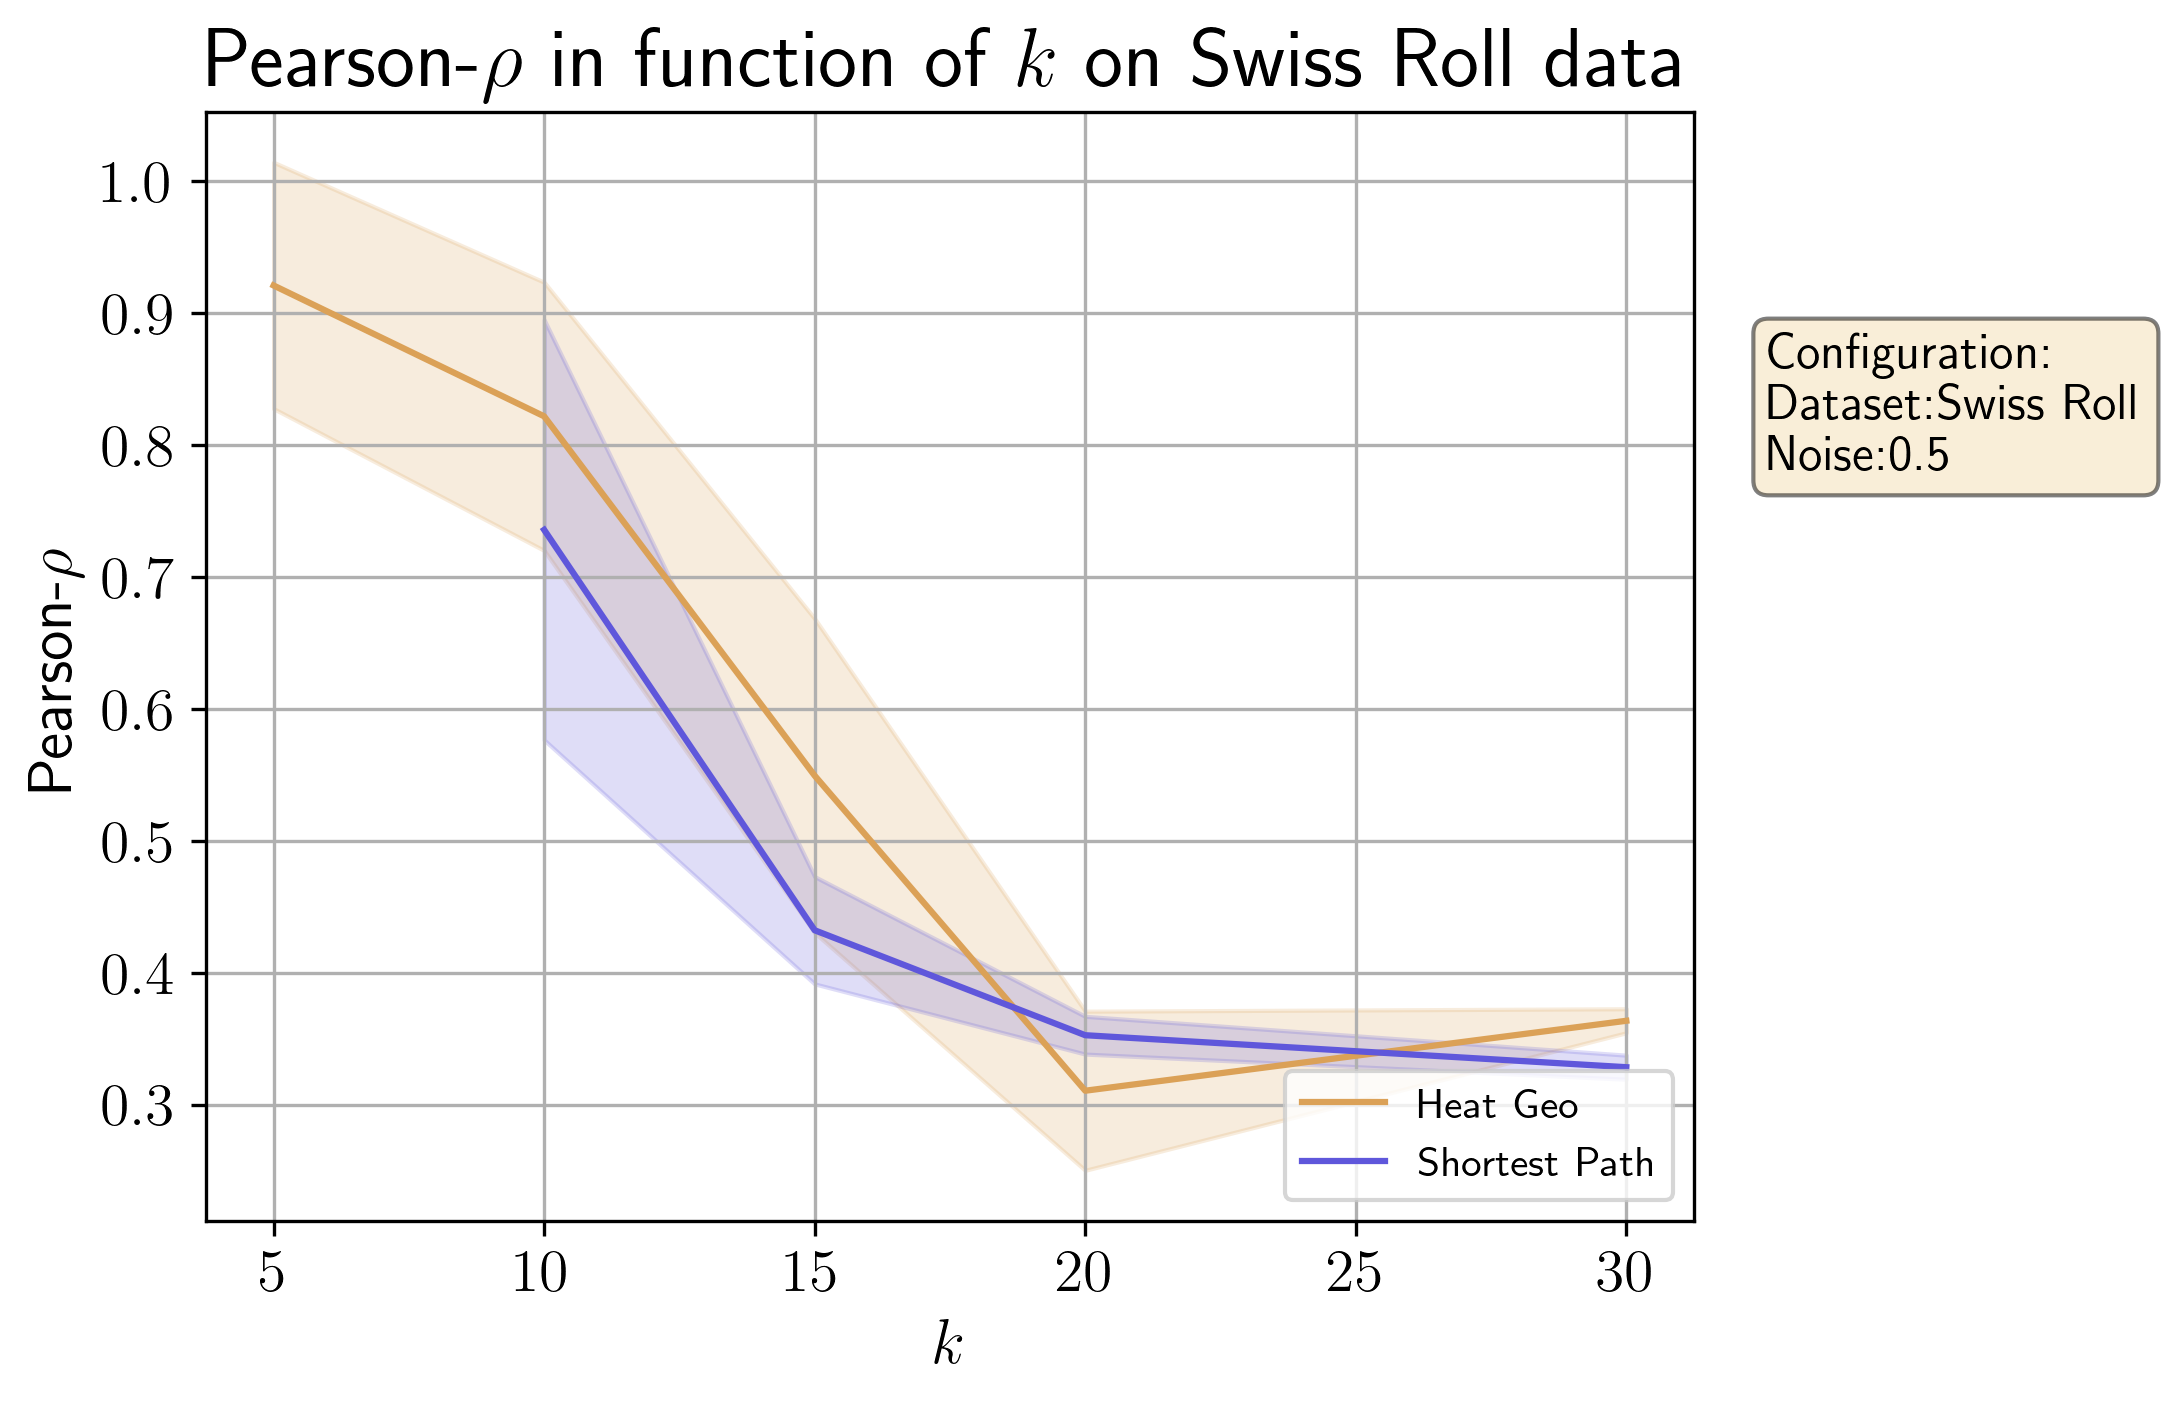

In [5]:
color_dict = {"heat_geo":cp[0],
              "heat_geo_auto":cp[1],
              "heat_phate":cp[2],
              "heat_phate_auto":cp[3],
              "phate":cp[4],
              "phate_auto":cp[5],
              "diff_map":cp[6],
              "rand_geo":cp[7],
              "shortest_path":cp[8]  }

## alternate font/graph format
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
plt.rc('font', weight='heavy')
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('axes', labelsize='x-large')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

# --------- COMMON PARAMETERS -----------
metric = "PearsonR"
xcol = "model.knn"
xlabel = r"$k$"
data = "swiss_roll"


common_constraints = {"data.manifold_noise":[0.5],
                    "data": [data]}

data_str_dict = {"swiss_roll":"Swiss Roll", "tree": "Tree"}
metric_str_dict = {"PearsonR":r"Pearson-$\rho$", "SpearmanR":r"Spearman-$\rho$", "Norm Fro N2": r"$\lVert \cdot \rVert_F$"}

common_constraints_str = {"Dataset": data_str_dict[common_constraints["data"][0]],
                            "Noise":common_constraints["data.manifold_noise"][0]
                        }


# ---------------------------------------


# ----------- HEAT GEO CONFIG  AUTO------------

color = color_dict["heat_geo_auto"]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_heat_geo
sweep_variables = heat_geo_sweep_variables

constraints = {"model.tau" : ["auto"],
               "model.knn" : np.array([ f for f in heat_geo_sweep_variables["model.knn"] ]).astype(float)
                #"model.filter_method": ["euler"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[30],
                }

label = "Heat Geo"

heat_geo_auto_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# ------------ HEAT PHATE CONFIG ------------
color = color_dict["heat_phate"]
no_sweep = False
df_results = df_heat_phate
sweep_variables = heat_phate_sweep_variables
constraints = {"model.knn" : np.array([ f for f in heat_phate_sweep_variables["model.knn"] ]).astype(float),
                #"model.filter_method": ["euler"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[15]
                }
label = "Heat PHATE"

heat_phate_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ------------ PHATE CONFIG ------------

color = color_dict["phate"]
no_sweep = False
df_results = df_phate
sweep_variables = phate_sweep_variables
constraints = { "model.knn" : np.array([ f for f in phate_sweep_variables["model.knn"] ]).astype(float)}

label = "Phate"

phate_sweep_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

#-  --------------------------------------


# -------------- DIFF MAP CONFIG ------------
color = color_dict["diff_map"]
no_sweep = False
df_results = df_diff_map
sweep_variables = diff_map_sweep_variables
constraints = {"model.knn" : np.array(diff_map_sweep_variables["model.knn"]).astype(float),
                #"model.knn" : [15]
                }

label = "Diffusion Map"

diff_map_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ----------- RAND GEO CONFIG ------------

color = color_dict["rand_geo"]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_rand_geo
sweep_variables = rand_geo_sweep_variables

constraints = {"model.knn" : np.array(rand_geo_sweep_variables["model.knn"]).astype(float),
                #"model.filter_method": ["symmetric"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[15],
                }

label = "Rand Geo"

rand_geo_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# ------------- Shortest Path CONFIG --------------
color = color_dict["shortest_path"]
no_sweep = False
df_results = df_shortest_path
sweep_variables = shortest_path_sweep_variables
constraints = {"model.knn" : np.array(shortest_path_sweep_variables["model.knn"]).astype(float)}

label = "Shortest Path"
shortest_path_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# PLOTTING 

configs = [heat_geo_auto_config, heat_phate_config, rand_geo_config, phate_sweep_config, diff_map_config, shortest_path_config]
configs = [heat_geo_auto_config, shortest_path_config]

fig, ax = plt.subplots()

for config in configs:

    constraints_ = {**config["constraints"], **common_constraints}

    m_df, s_df = get_results_to_plot(config["df_results"], config["sweep_variables"], constraints = constraints_, metric = metric)

    if config["no_sweep"]: # Only one measurement to plot
        ax.axhline(m_df[metric].item(), label = config["label"], color = config["color"])
        ax.axhspan(m_df[metric].item()-s_df[metric].item(),m_df[metric].item()+s_df[metric].item(), alpha= 0.2, color = config["color"])
    else:
        ax.plot(m_df[xcol],m_df[metric], label = config["label"], color = config["color"])
        ax.fill_between(m_df[xcol].astype(float), m_df[metric] - s_df[metric], m_df[metric] + s_df[metric], alpha=0.2, color = config["color"])

ax.legend(loc = "lower right")
ax.set_title(f"{metric_str_dict[metric]} in function of {xlabel} on {data_str_dict[data]} data", fontsize = 20)
ax.set_xlabel(xlabel, fontsize = 15)
ax.set_ylabel(metric_str_dict[metric], fontsize = 15)

textstr = "\n".join([f"{k}:{v}" for k,v in common_constraints_str.items()])
textstr = "Configuration: \n " + textstr
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 0.8, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
plt.grid()
plt.show()

#### Order

In [9]:
model_name = "heat_geo_order_sweep"
run_name = "2023-05-07_20-34-35" #"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
heat_geo_sweep_variables = get_sweep_variables(exp_config)
df_heat_geo = get_all_results_exp(model_name, run_name, heat_geo_sweep_variables)

model_name = "heat_phate_order_sweep"
run_name = "2023-05-07_20-34-56" #"2023-04-22_20-54-37"
exp_config = get_experiment_config(model_name, run_name)
heat_phate_sweep_variables = get_sweep_variables(exp_config)
df_heat_phate = get_all_results_exp(model_name, run_name, heat_phate_sweep_variables)

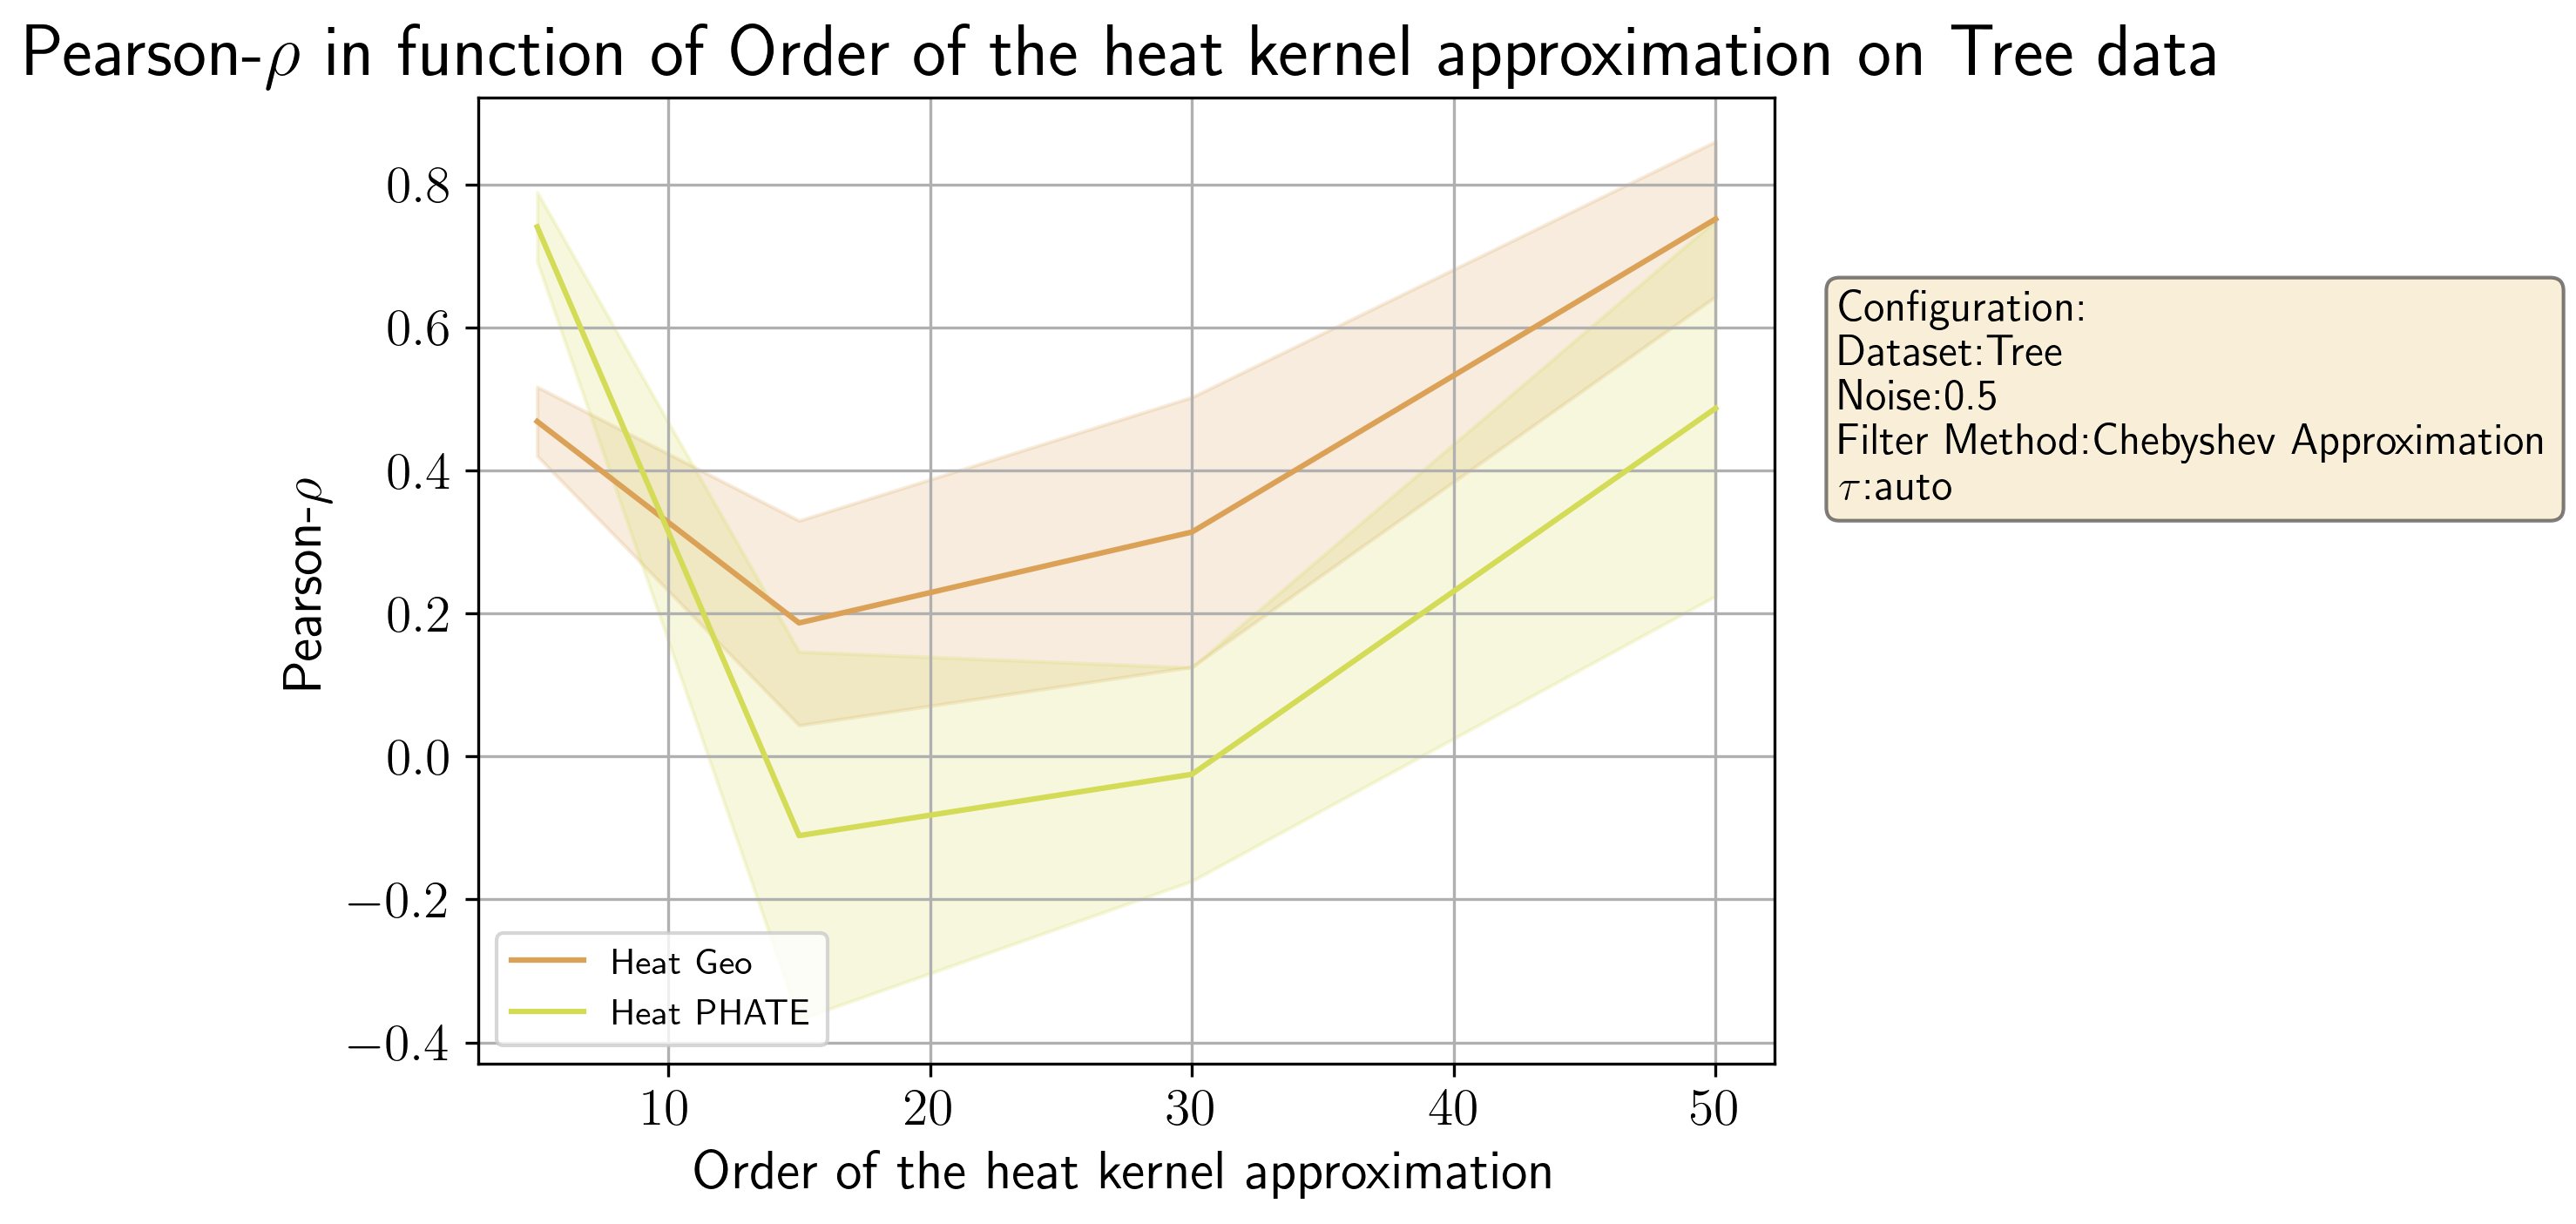

In [10]:
color_dict = {"heat_geo":cp[0],
              "heat_geo_auto":cp[1],
              "heat_phate":cp[2],
              "heat_phate_auto":cp[3],
              "phate":cp[4],
              "phate_auto":cp[5],
              "diff_map":cp[6],
              "rand_geo":cp[7],
              "shortest_path":cp[8]  }

# --------- COMMON PARAMETERS -----------
metric = "PearsonR"
xcol = "model.order"
xlabel = r"Order of the heat kernel approximation"
data = "tree"


common_constraints = {"data.manifold_noise":[0.5],
                    "data": [data],
                    "model.filter_method":["mar"],
                    "model.tau":["auto"]}

data_str_dict = {"swiss_roll":"Swiss Roll", "tree": "Tree"}
metric_str_dict = {"PearsonR":r"Pearson-$\rho$", "SpearmanR":r"Spearman-$\rho$", "Norm Fro N2": r"$\lVert \cdot \rVert_F$"}
filter_str_dict = {"mar": "Chebyshev Approximation", "euler": "Euler Approximation"}

common_constraints_str = {"Dataset": data_str_dict[common_constraints["data"][0]],
                            "Noise":common_constraints["data.manifold_noise"][0],
                            "Filter Method":filter_str_dict[common_constraints["model.filter_method"][0]],
                            r"$\tau$":common_constraints["model.tau"][0]
                        }


# ---------------------------------------


# ----------- HEAT GEO CONFIG------------

color = color_dict["heat_geo_auto"]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_heat_geo
sweep_variables = heat_geo_sweep_variables

constraints = { "model.order" : np.array([ f for f in heat_geo_sweep_variables["model.order"] ]).astype(float)
                #"model.filter_method": ["euler"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[30],
                }

label = "Heat Geo"

heat_geo_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# ------------ HEAT PHATE CONFIG ------------
color = color_dict["heat_phate"]
no_sweep = False
df_results = df_heat_phate
sweep_variables = heat_phate_sweep_variables
constraints = {"model.order" : np.array([ f for f in heat_phate_sweep_variables["model.order"] ]).astype(float),
                #"model.filter_method": ["euler"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[15]
                }

label = "Heat PHATE"

heat_phate_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# PLOTTING 

configs = [heat_geo_config, heat_phate_config]

fig, ax = plt.subplots()

for config in configs:

    constraints_ = {**config["constraints"], **common_constraints}

    m_df, s_df = get_results_to_plot(config["df_results"], config["sweep_variables"], constraints = constraints_, metric = metric)

    if config["no_sweep"]: # Only one measurement to plot
        ax.axhline(m_df[metric].item(), label = config["label"], color = config["color"])
        ax.axhspan(m_df[metric].item()-s_df[metric].item(),m_df[metric].item()+s_df[metric].item(), alpha= 0.2, color = config["color"])
    else:
        ax.plot(m_df[xcol],m_df[metric], label = config["label"], color = config["color"])
        ax.fill_between(m_df[xcol].astype(float), m_df[metric] - s_df[metric], m_df[metric] + s_df[metric], alpha=0.2, color = config["color"])

ax.legend()
ax.set_title(f"{metric_str_dict[metric]} in function of {xlabel} on {data_str_dict[data]} data", fontsize = 20)
ax.set_xlabel(xlabel, fontsize = 15)
ax.set_ylabel(metric_str_dict[metric], fontsize = 15)

textstr = "\n".join([f"{k}:{v}" for k,v in common_constraints_str.items()])
textstr = "Configuration: \n " + textstr
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 0.8, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
plt.grid()
plt.show()

#### Harnack regularization

In [27]:
model_name = "heat_geo"
run_name = "2023-05-07_11-37-24" #"2023-04-22_20-54-39"
exp_config = get_experiment_config(model_name, run_name)
heat_geo_sweep_variables = get_sweep_variables(exp_config)
df_heat_geo = get_all_results_exp(model_name, run_name, heat_geo_sweep_variables)

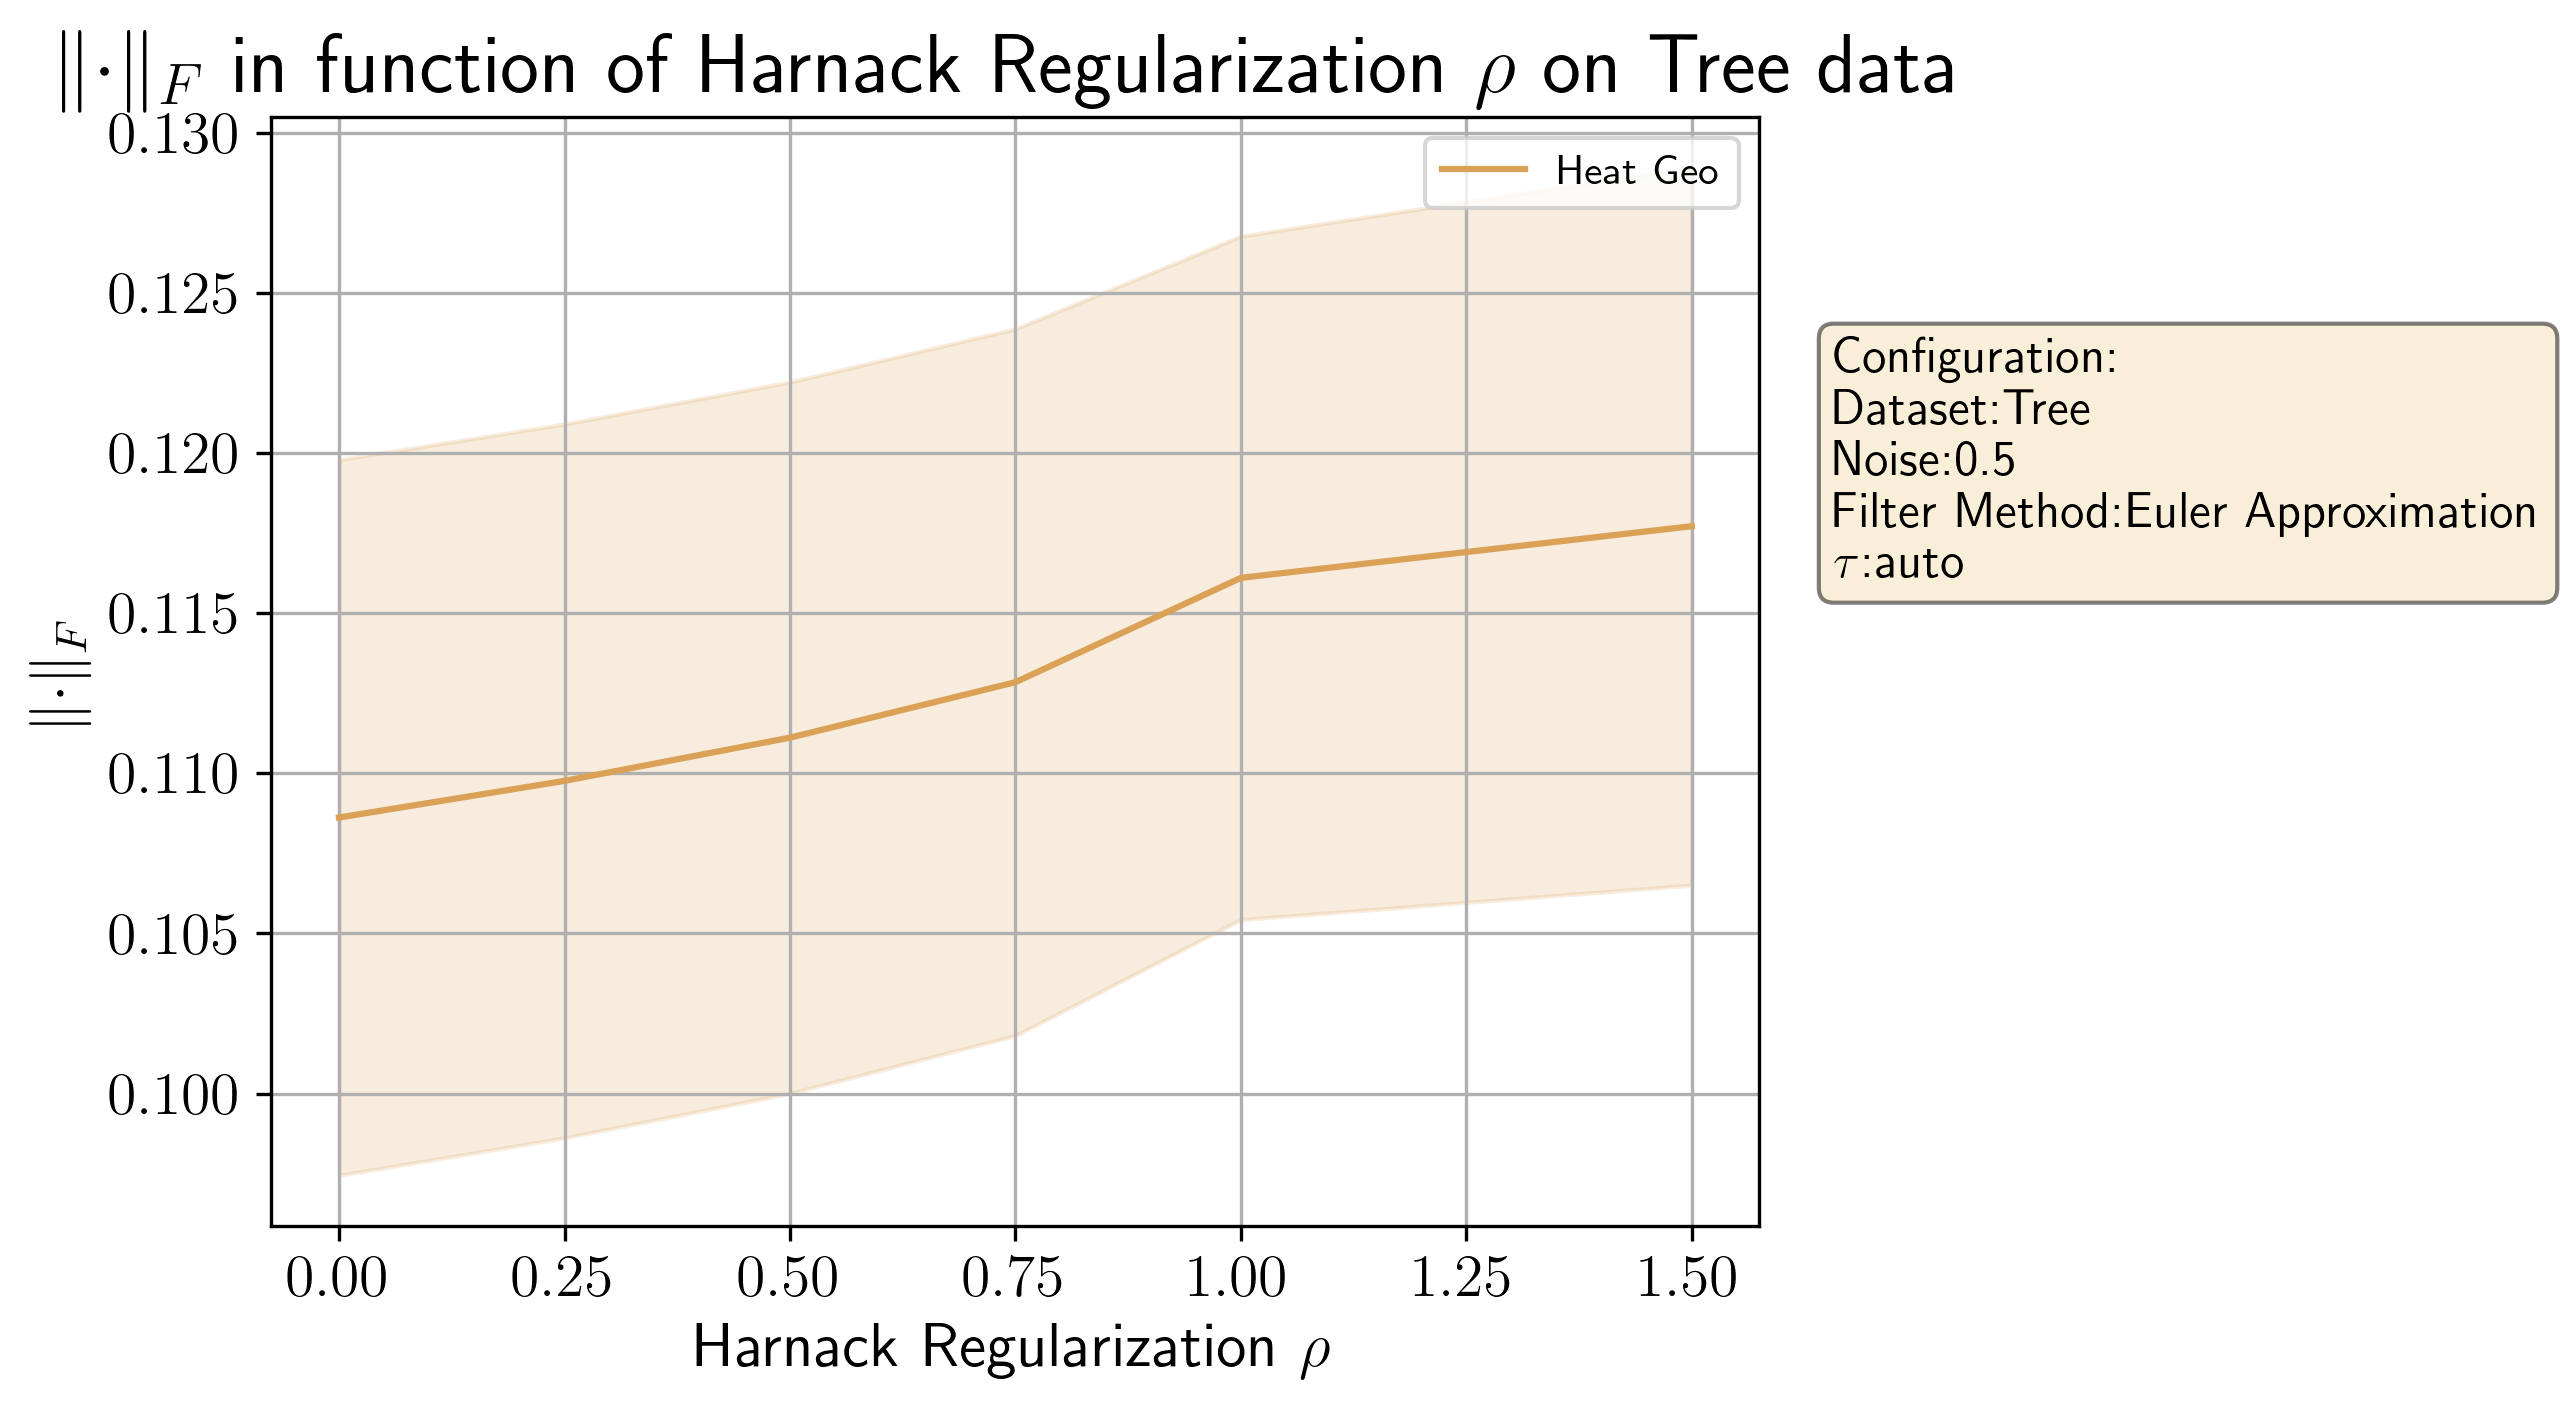

In [39]:
color_dict = {"heat_geo":cp[0],
              "heat_geo_auto":cp[1],
              "heat_phate":cp[2],
              "heat_phate_auto":cp[3],
              "phate":cp[4],
              "phate_auto":cp[5],
              "diff_map":cp[6],
              "rand_geo":cp[7],
              "shortest_path":cp[8]  }

# --------- COMMON PARAMETERS -----------
metric = "Norm Fro N2"
xcol = "model.harnack_regul"
xlabel = r"Harnack Regularization $\rho$"
data = "tree"


common_constraints = {"data.manifold_noise":[0.5],
                    "data": [data],
                    "model.filter_method":["euler"],
                    "model.tau":["auto"],
                    "model.knn": [15],
                    "model.order":[30]}

data_str_dict = {"swiss_roll":"Swiss Roll", "tree": "Tree"}
metric_str_dict = {"PearsonR":r"Pearson-$\rho$", "SpearmanR":r"Spearman-$\rho$", "Norm Fro N2": r"$\lVert \cdot \rVert_F$"}
filter_str_dict = {"mar": "Chebyshev Approximation", "euler": "Euler Approximation"}

common_constraints_str = {"Dataset": data_str_dict[common_constraints["data"][0]],
                            "Noise":common_constraints["data.manifold_noise"][0],
                            "Filter Method":filter_str_dict[common_constraints["model.filter_method"][0]],
                            r"$\tau$":common_constraints["model.tau"][0]
                        }


# ---------------------------------------


# ----------- HEAT GEO CONFIG------------

color = color_dict["heat_geo_auto"]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_heat_geo
sweep_variables = heat_geo_sweep_variables

constraints = { "model.harnack_regul" : np.array([ f for f in heat_geo_sweep_variables["model.harnack_regul"] ]).astype(float)
                #"model.filter_method": ["euler"],
                #"model.lap_type":["combinatorial"],
                #"model.knn":[10],
                #"model.order":[30],
                }

label = "Heat Geo"

heat_geo_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# PLOTTING 

configs = [heat_geo_config]

fig, ax = plt.subplots()

for config in configs:

    constraints_ = {**config["constraints"], **common_constraints}

    m_df, s_df = get_results_to_plot(config["df_results"], config["sweep_variables"], constraints = constraints_, metric = metric)

    if config["no_sweep"]: # Only one measurement to plot
        ax.axhline(m_df[metric].item(), label = config["label"], color = config["color"])
        ax.axhspan(m_df[metric].item()-s_df[metric].item(),m_df[metric].item()+s_df[metric].item(), alpha= 0.2, color = config["color"])
    else:
        ax.plot(m_df[xcol],m_df[metric], label = config["label"], color = config["color"])
        ax.fill_between(m_df[xcol].astype(float), m_df[metric] - s_df[metric], m_df[metric] + s_df[metric], alpha=0.2, color = config["color"])

ax.legend()
ax.set_title(f"{metric_str_dict[metric]} in function of {xlabel} on {data_str_dict[data]} data", fontsize = 20)
ax.set_xlabel(xlabel, fontsize = 15)
ax.set_ylabel(metric_str_dict[metric], fontsize = 15)

textstr = "\n".join([f"{k}:{v}" for k,v in common_constraints_str.items()])
textstr = "Configuration: \n " + textstr
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 0.8, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
plt.grid()
plt.show()

## Embedding comparison

In [5]:
heat_geo_sweep_variables

{'model.knn': ['10', '15'],
 'model.tau': ['0.1', '1', '10', '50', 'auto'],
 'model.harnack_regul': ['0', '0.25', '0.5', '0.75', '1', '1.5']}

In [4]:
model_name = "heat_geo_embed"
run_name = "2023-05-13_11-48-46" #"2023-04-22_21-17-47"
exp_config = get_experiment_config(model_name, run_name)
heat_geo_sweep_variables = get_sweep_variables(exp_config)
df_heat_geo = get_all_results_exp(model_name, run_name, heat_geo_sweep_variables)

model_name = "rand_geo_embed"
run_name = "2023-05-13_11-48-52"#"2023-04-22_21-17-48"
exp_config = get_experiment_config(model_name, run_name)
rand_geo_sweep_variables = get_sweep_variables(exp_config)
df_rand_geo = get_all_results_exp(model_name, run_name, rand_geo_sweep_variables)

model_name = "heat_phate_embed"
run_name = "2023-05-13_11-48-52" #"2023-04-22_21-17-48"
exp_config = get_experiment_config(model_name, run_name)
heat_phate_sweep_variables = get_sweep_variables(exp_config)
df_heat_phate = get_all_results_exp(model_name, run_name, heat_phate_sweep_variables)

model_name = "phate_embed"
run_name = "2023-05-13_11-48-52" #"2023-04-22_21-17-48"
exp_config = get_experiment_config(model_name, run_name)
phate_sweep_variables = get_sweep_variables(exp_config)
df_phate = get_all_results_exp(model_name, run_name, phate_sweep_variables)

model_name =  "diff_map_embed"
run_name = "2023-05-13_11-48-55"# "2023-04-22_21-17-32"
exp_config = get_experiment_config(model_name, run_name)
diff_map_sweep_variables = get_sweep_variables(exp_config)
df_diff_map = get_all_results_exp(model_name, run_name, diff_map_sweep_variables)

model_name = "shortest_path_embed"
run_name = "2023-05-13_11-48-52" #"2023-04-24_19-36-52"
exp_config = get_experiment_config(model_name, run_name)
shortest_path_sweep_variables = get_sweep_variables(exp_config)
df_shortest_path = get_all_results_exp(model_name, run_name, shortest_path_sweep_variables)

model_name = "tsne_embed"
run_name = "2023-05-13_11-48-52" # "2023-04-22_21-17-48"
exp_config = get_experiment_config(model_name, run_name)
tsne_sweep_variables = get_sweep_variables(exp_config)
df_tsne = get_all_results_exp(model_name, run_name, tsne_sweep_variables)


model_name = "umap_embed"
run_name = "2023-05-13_11-49-00" #"2023-04-22_21-17-48"
exp_config = get_experiment_config(model_name, run_name)
umap_sweep_variables = get_sweep_variables(exp_config)
df_umap = get_all_results_exp(model_name, run_name, umap_sweep_variables)

No PKL file found for heat_geo_embed 2023-05-13_11-48-46 263
Config for this run : 
{'original_work_dir': '${hydra:runtime.cwd}', 'seed': None, 'n_seeds': 10, 'name': 'heat_geo_embed', 'dataset_name': 'tree_high', 'data': {'_target_': 'src.dataset.TreePhate', '_partial_': True, 'n_dim': 30, 'n_points': 500, 'n_branch': 5, 'manifold_noise': 0.5, 'knn_geodesic': 10, 'clustered': 'None'}, 'model_name': 'heat_geo', 'model': {'_target_': 'src.embedding.new_HeatGeo', 'knn': 10, 'anisotropy': 0, 'decay': 40, 'n_pca': False, 'tau': 50, 'emb_dim': 2, 'tau_min': 0.05, 'tau_max': 200, 'n_tau': 1, 'order': 30, 'filter_method': 'euler', 'lap_type': 'combinatorial', 'log_normalize': False, 'scale_factor': 1.0, 'denoising': False, 'n_ref': 1, 'n_svd': 0, 'harnack_regul': 1.5, 'graph_type': 'alpha', 'mds_weights_type': 'None'}}
No PKL file found for heat_geo_embed 2023-05-13_11-48-46 119
Config for this run : 
{'original_work_dir': '${hydra:runtime.cwd}', 'seed': None, 'n_seeds': 10, 'name': 'heat_geo

ValueError: can only convert an array of size 1 to a Python scalar

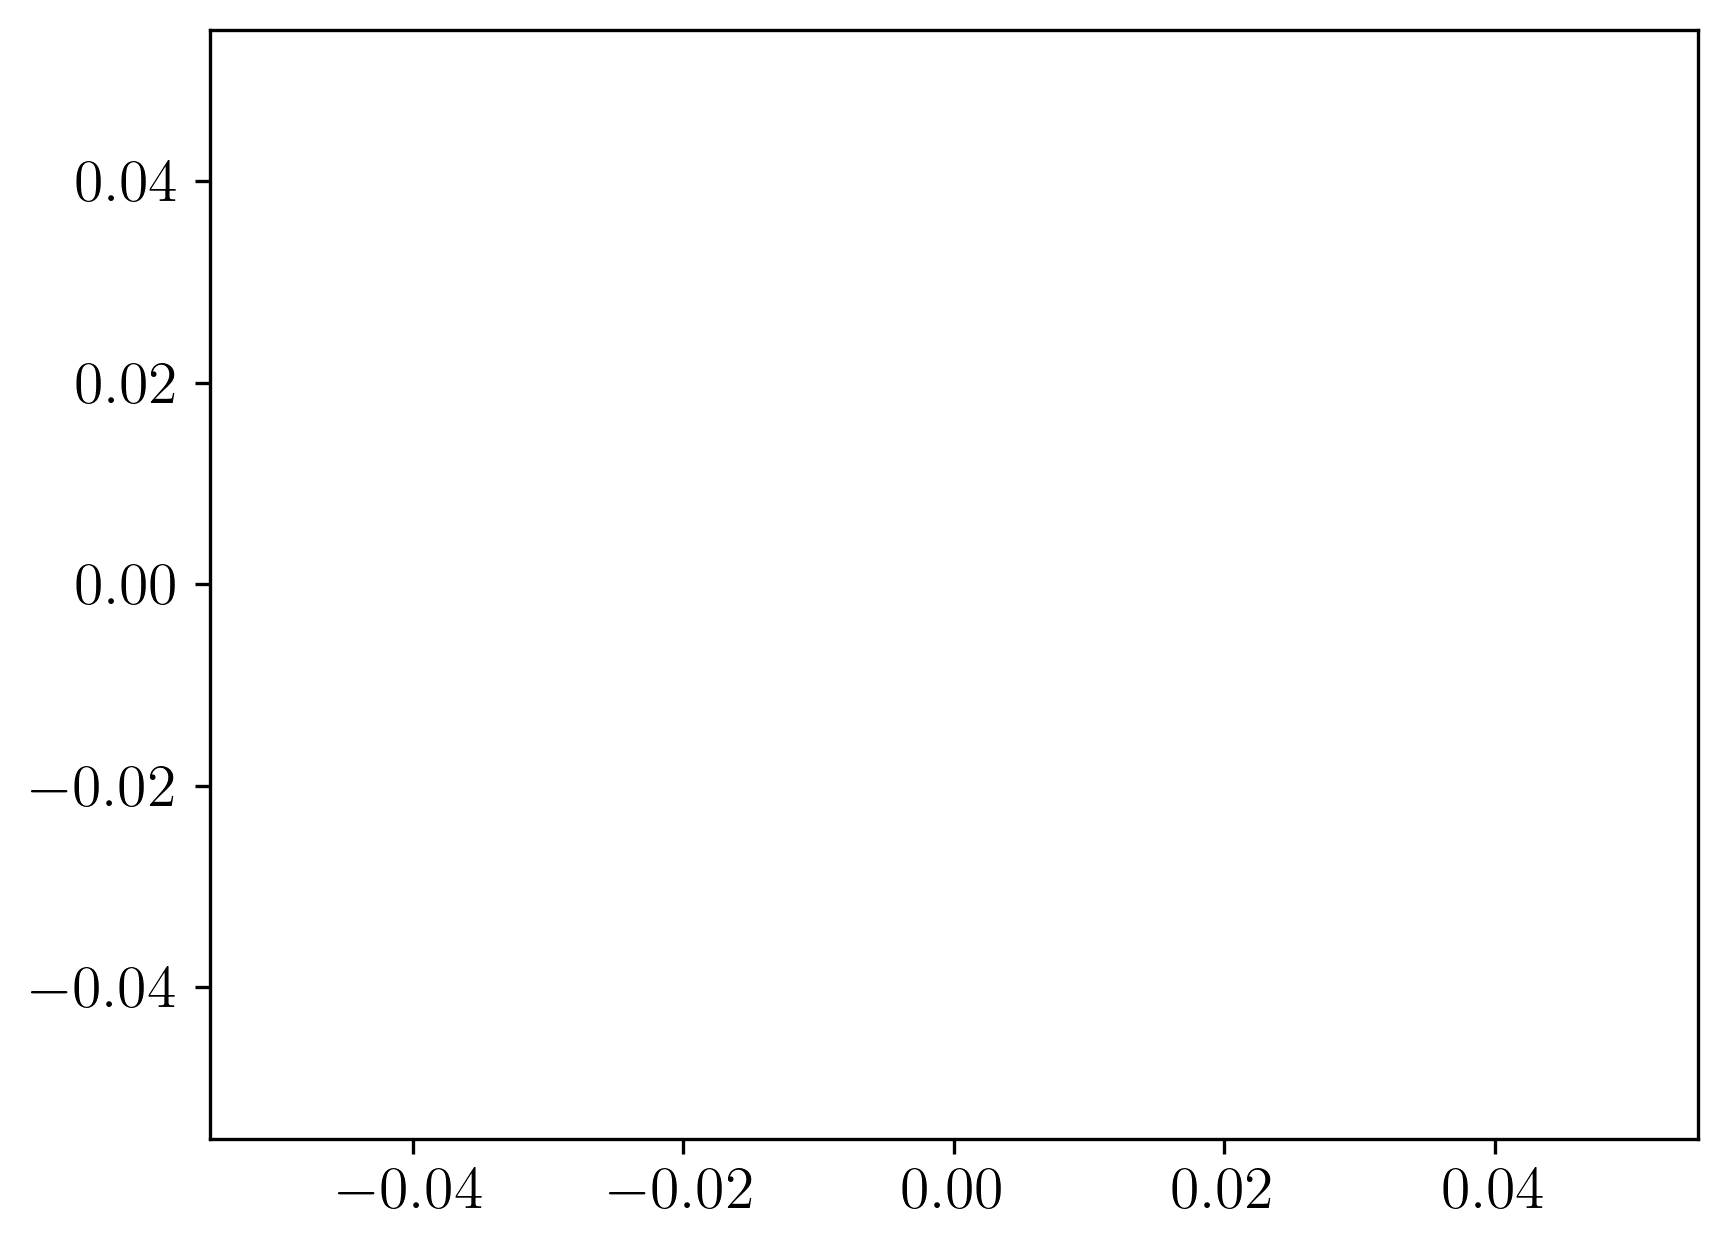

In [5]:
import matplotlib.pyplot as plt

# --------- COMMON PARAMETERS -----------
metric = "PearsonR"
xcol = "model.tau"
xlabel = "tau"
data = "tree"

common_constraints = {"data.manifold_noise":[5],
                    "data": [data]}

# ---------------------------------------

# ----------- HEAT GEO CONFIG ------------

color = cp[0]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_heat_geo
sweep_variables = heat_geo_sweep_variables

constraints = {"model.tau" :  np.array([ f for f in heat_geo_sweep_variables["model.tau"] if f != "auto"]).astype(float) ,
                "model.filter_method": ["euler"],
                "model.lap_type":["combinatorial"],
                "model.knn":[10],
                "model.order":[15],
                }

label = "Heat Geo"

heat_geo_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# ------------ HEAT PHATE CONFIG ------------
color = cp[1]
no_sweep = False
df_results = df_heat_phate
sweep_variables = heat_phate_sweep_variables
constraints = {"model.tau" : np.array([ f for f in heat_phate_sweep_variables["model.tau"] if f != "auto"]).astype(float),
                "model.filter_method": ["euler"],
                "model.lap_type":["combinatorial"],
                "model.knn":[10],
                "model.order":[15]}

label = "Heat Phate"

heat_phate_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ------------ PHATE AUTO CONFIG ------------

color = cp[2]
no_sweep = True
df_results = df_phate
sweep_variables = phate_sweep_variables
constraints = {"model.n_pca" : [50], "model.tau" : ["auto"]}

label = "Phate - auto"

phate_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

#-  --------------------------------------

# ------------ PHATE SWEEP CONFIG ------------

color = cp[3]
no_sweep = False
df_results = df_phate
sweep_variables = phate_sweep_variables
constraints = {"model.n_pca" : [50], 
               "model.tau" : np.array([ f for f in phate_sweep_variables["model.tau"] if f != "auto"]).astype(float)}

label = "Phate - sweep"

phate_sweep_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

#-  --------------------------------------

# -------------- DIFF MAP CONFIG ------------
color = cp[4]
no_sweep = False
df_results = df_diff_map
sweep_variables = diff_map_sweep_variables
constraints = {"model.tau" : np.array(diff_map_sweep_variables["model.tau"]).astype(float),
                "model.knn" : [10]}

label = "Diffusion Map"

diff_map_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# ------------- Shortest Path CONFIG --------------
color = cp[5]
no_sweep = True
df_results = df_shortest_path
sweep_variables = shortest_path_sweep_variables
constraints = {"model.knn" : [10]}

label = "Shortest Path"
shortest_path_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ------------- TSNE CONFIG --------------
color = cp[6]
no_sweep = True
df_results = df_tsne
sweep_variables = tsne_sweep_variables
constraints = {"model.perplexity" : [100]}

label = "TSNE"
tsne_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ------------- UMAP CONFIG --------------
color = cp[7]
no_sweep = True
df_results = df_umap
sweep_variables = umap_sweep_variables
constraints = {"model.min_dist" : [0.1],
                "model.n_neighbors" : [10]}

label = "UMAP"
umap_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# PLOTTING 

configs = [heat_geo_config, heat_phate_config, phate_config, phate_sweep_config, diff_map_config, shortest_path_config, tsne_config, umap_config]

fig, ax = plt.subplots()

for config in configs:

    constraints_ = {**config["constraints"], **common_constraints}

    m_df, s_df = get_results_to_plot(config["df_results"], config["sweep_variables"], constraints = constraints_, metric = metric)

    if config["no_sweep"]: # Only one measurement to plot
        ax.axhline(m_df[metric].item(), label = config["label"], color = config["color"])
        ax.axhspan(m_df[metric].item()-s_df[metric].item(),m_df[metric].item()+s_df[metric].item(), alpha= 0.2, color = config["color"])
    else:
        ax.plot(m_df[xcol].astype(float),m_df[metric], label = config["label"], color = config["color"])
        ax.fill_between(m_df[xcol].astype(float), m_df[metric] - s_df[metric], m_df[metric] + s_df[metric], alpha=0.2, color = config["color"])

ax.legend()
ax.set_title(f"{metric} in function of {xlabel} on {data} data", fontsize = 20)
ax.set_xlabel(xlabel, fontsize = 15)
ax.set_ylabel(metric, fontsize = 15)

textstr = "\n".join([f"{k}:{v}" for k,v in common_constraints.items()])
textstr = "Common parameters: \n " + textstr
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 0.8, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
plt.show() 


In [ ]:
metrics = [("PearsonR",max),("SpearmanR",max),("Norm Fro N2",min),("Norm inf N2",min),("time(s)",min)]
#metrics = [("Norm Fro N2",min)]

df_res_metrics = []
for metric, best_order in metrics:
    df_list = []

    for df, sweep_variables, method_name in [(df_heat_phate, heat_phate_sweep_variables, "Heat-PHATE"),
                                            (df_phate, phate_sweep_variables, "PHATE"),
                                            (df_heat_geo, heat_geo_sweep_variables, "Heat-Geo"),
                                            (df_rand_geo, rand_geo_sweep_variables, "Rand-Geo"),
                                            (df_diff_map, diff_map_sweep_variables, "Diffusion Map"),
                                            (df_shortest_path, shortest_path_sweep_variables, "Shortest Path")]:
        best_df,_ = get_best_results_test(df,metric, sweep_variables, best_order)
        best_df["Method"] = method_name
        df_list.append(best_df[["data","data.manifold_noise","Method",metric]])

    df_res = pd.concat(df_list).copy()
    df_res = df_res.reset_index(drop = True)

    ### Bold the best results :

    df_res["mean"] = df_res[metric].apply(lambda x: float(x.split(" \pm ")[0][1:]))

    idx = df_res.groupby(["data","data.manifold_noise"])["mean"].transform(best_order) == df_res["mean"]

    for i,id in zip(list(idx.index),list(idx.values)):
        if id:
            df_res.loc[i,metric] = "$\mathbf{" + df_res.loc[i,metric][1:-1] + "}$"

    df_res = df_res.drop(columns = ["mean"])


    # Append the results for this metric 
    df_res_metrics.append(df_res)

from functools import reduce 
df_all_metrics = reduce(lambda x,y : pd.merge(x,y, on = ["Method","data","data.manifold_noise"]),df_res_metrics)
df_all_metrics.sort_values(by = ["data","data.manifold_noise","Method"],inplace=True)


df_all_metrics.rename(columns = {"data.manifold_noise":"Noise level"}, inplace = True)
df_all_metrics["data"] = df_all_metrics["data"].apply(lambda x: x.replace("_"," ").capitalize())

df_all_metrics = df_all_metrics.reset_index(drop = True)

In [6]:
metrics = [("PearsonR",max),("SpearmanR",max),("Norm Fro N2",min),("Norm inf N2",min),("time(s)",min)]

df_res_metrics = []
for metric , best_order in metrics:
    df_list = []

    for df, sweep_variables, method_name in [(df_heat_phate, heat_phate_sweep_variables, "Heat-PHATE"),
                                            (df_phate, phate_sweep_variables, "PHATE"),
                                            (df_heat_geo, heat_geo_sweep_variables, "Heat-Geo"),
                                            (df_rand_geo, rand_geo_sweep_variables, "Rand-Geo"),
                                            (df_diff_map, diff_map_sweep_variables, "Diffusion Map"),
                                            (df_shortest_path, shortest_path_sweep_variables, "Shortest Path"),
                                            (df_tsne, tsne_sweep_variables, "TSNE"),
                                            (df_umap, umap_sweep_variables, "UMAP")]:
        best_df,_ = get_best_results_test(df,metric, sweep_variables, best_order)
        best_df["Method"] = method_name
        df_list.append(best_df[["data","data.manifold_noise","Method",metric]])

    df_res = pd.concat(df_list).copy()
    df_res = df_res.reset_index(drop = True)

    ### Bold the best results :

    df_res["mean"] = df_res[metric].apply(lambda x: float(x.split(" \pm ")[0][1:]))

    idx = df_res.groupby(["data","data.manifold_noise"])["mean"].transform(best_order) == df_res["mean"]

    for i,id in zip(list(idx.index),list(idx.values)):
        if id:
            df_res.loc[i,metric] = "$\mathbf{" + df_res.loc[i,metric][1:-1] + "}$"

    df_res = df_res.drop(columns = ["mean"])


    df_res_metrics.append(df_res)

from functools import reduce 
df_all_metrics = reduce(lambda x,y : pd.merge(x,y, on = ["Method","data","data.manifold_noise"]),df_res_metrics)
df_all_metrics.sort_values(by = ["data","data.manifold_noise","Method"],inplace=True)

#df_all_metrics = pd.merge(df_res_metrics[0],df_res_metrics[1], on = ["Method","data","data.manifold_noise"])
#df_all_metrics.sort_values(by = ["data","data.manifold_noise","Method"],inplace=True)


df_all_metrics.rename(columns = {"data.manifold_noise":"Noise level"}, inplace = True)
df_all_metrics["data"] = df_all_metrics["data"].apply(lambda x: x.replace("_"," ").capitalize())

df_all_metrics = df_all_metrics.reset_index(drop = True)

In [7]:
df_all_metrics.drop(df_all_metrics.loc[(df_all_metrics["data"].str.contains("roll")) & (df_all_metrics["Noise level"]>5)].index, inplace = True)

In [8]:
df_latex = df_all_metrics.to_latex(escape = False, index = False)

split_every_n = 8
for split_idx in range(len(df_all_metrics)// split_every_n):
    df_latex = add_hline(df_latex, split_every_n*(split_idx+1) + split_idx)

print(df_latex)

\begin{tabular}{lrllllll}
\toprule
     data &  Noise level &        Method &                   PearsonR &                  SpearmanR &                Norm Fro N2 &                Norm inf N2 &                     time(s) \\
\midrule
     Tree &          0.1 & Diffusion Map &          $0.748 \pm 0.125$ &          $0.733 \pm 0.111$ &          $0.113 \pm 0.012$ &          $0.161 \pm 0.019$ &          $17.289 \pm 0.118$ \\
     Tree &          0.1 &      Heat-Geo & $\mathbf{0.943 \pm 0.037}$ &  $\mathbf{0.94 \pm 0.037}$ &          $0.113 \pm 0.012$ &          $0.161 \pm 0.019$ &          $19.135 \pm 0.729$ \\
     Tree &          0.1 &    Heat-PHATE &           $0.872 \pm 0.04$ &           $0.83 \pm 0.061$ &          $0.113 \pm 0.012$ &          $0.161 \pm 0.019$ &          $18.979 \pm 0.556$ \\
     Tree &          0.1 &         PHATE &          $0.564 \pm 0.039$ &          $0.469 \pm 0.052$ &          $0.113 \pm 0.011$ &          $0.161 \pm 0.018$ &           $17.99 \pm 0.462$ \\
     T

## Optimal tau heuristic

### Loading a sweep to assess what hyperparameters are best.

In [5]:
from src import results_utils

model_name = "heat_geo"
run_name = "2023-04-15_19-30-45"
exp_config = get_experiment_config(model_name, run_name)
heat_geo_sweep_variables = get_sweep_variables(exp_config)
df_heat_geo = get_all_results_exp(model_name, run_name, heat_geo_sweep_variables)


metric = "SpearmanR" # metric we want to optimize
order_metric = max #wether we want to maximize or minimize the metric
data_name = "swiss_roll"
manifold_noise = 0.5
df_res = results_utils.get_best_results(df_heat_geo,metric = metric, sweep_variables = heat_geo_sweep_variables, best_order = order_metric)

df_ = df_res.loc[(df_res["data"]==data_name) & (df_res["data.manifold_noise"]==manifold_noise)]
# setting best hyperparameters
best_hyper_params = {concept : df_[concept].item() for concept in heat_geo_sweep_variables if concept not in ["data","data.manifold_noise"]}

print("Best Hyperparameters for {} with {} noise :".format(data_name,manifold_noise))
print(best_hyper_params)

Best Hyperparameters for swiss_roll with 0.5 noise :
{'model.knn': 10, 'model.order': 15, 'model.tau': 5.0}


In [6]:
import os
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from hydra.utils import instantiate
from omegaconf import OmegaConf
import time

with initialize(version_base=None, config_path="../config"):
    cfg = compose(config_name = "main", overrides=[f"data={data_name}",f"data.manifold_noise={manifold_noise}", "model=heat_geo", "model.knn=10","model.order=30"])
    print(cfg)

# Update the default config with the best hyperparameters
for concept, value in best_hyper_params.items():
    cfg_ = cfg
    k_list = concept.split(".")
    for c_ in k_list[:1]:
        cfg_  = cfg_[c_] 
    cfg_[k_list[-1]] = value

{'original_work_dir': '${hydra:runtime.cwd}', 'seed': None, 'n_seeds': 10, 'name': 'default', 'dataset_name': 'swiss_roll', 'data': {'_target_': 'src.dataset.SwissRollStretch', '_partial_': True, 'n_points': 2000, 'manifold_noise': 0.5, 'width': 5, 'rotate': False, 'rotate_dim': 3, 'clustered': False}, 'model_name': 'heat_geo', 'model': {'_target_': 'src.embedding.new_HeatGeo', 'knn': 10, 'anisotropy': 0, 'decay': 40, 'n_pca': False, 'tau': 'auto', 'emb_dim': 10, 'tau_min': 0.05, 'tau_max': 200, 'n_tau': 1, 'order': 30, 'filter_method': 'mar', 'lap_type': 'normalized', 'log_normalize': False, 'scale_factor': 1.0, 'denoising': False, 'n_ref': 1, 'n_svd': 0, 'harnack_regul': 0, 'graph_type': 'alpha', 'mds_weights_type': 'None,', 'mds_weights_args': 'None', 'denoise_regul': 0.0}, 'launcher': {'hydra': {'launcher': 'joblib'}}}


In [7]:
cfg.model.filter_method = "euler"
cfg.model.lap_type = "combinatorial"
cfg.model.order = 30
cfg.model.log_normalize = False


### Running the model for different taus

This is quite inefficient as we are making a new model for each tau but that allows to reuse the codebase directly

In [8]:
from src.knn_methods import KNNClassifier
import pandas as pd
import scipy

df = []

for filter_method in ["euler"]:

    cfg.model.filter_method = filter_method
    taus = [ 0.1,1,5,10,50,100]

    seed = 0

    ks = [5, 10,20,30,40,50]
    columns=[
            "Tau",
            "Seed",
            "# group",
            "SpearmanR",
            "PearsonR",
            *[f"P@{k}" for k in ks],
            "Norm Fro",
            "Norm inf",
            "Norm Fro N2",
            "Norm inf N2",
            "Entropy",
            "Full Pearson",
            "Full Spearman",
            "Bias",
            "Variance",
            "time(s)",
        ]

    dfs = []
    for tau in taus:
        print(f"Computing for tau = {tau}.....")
        cfg.model.tau = tau
        model = instantiate(cfg.model)
        ds = instantiate(cfg.data)(random_state = 42 + seed)
        data, labels = ds.X, ds.labels
        ground_dist = ds.get_geodesic()
        start_time = time.time()
        knn_exp = KNNClassifier(model)
        knn_exp.fit(data)
        res = knn_exp.evaluate(ground_dist, ks=ks)
        end_time = time.time() - start_time

        full_pearson = scipy.stats.pearsonr(knn_exp.dist.flatten(), ground_dist.flatten())[0]
        full_spearman = scipy.stats.spearmanr(knn_exp.dist.flatten(), ground_dist.flatten())[0]
        full_var = np.std(knn_exp.dist.flatten())
        full_mean = np.mean(knn_exp.dist.flatten())
        results = [[tau, 42+seed, cfg.data.n_points, *res, knn_exp.model.entro_H[0], full_pearson, full_spearman, full_mean, full_var, end_time]]
        df_run = pd.DataFrame(results, columns=columns)
        dfs.append(df_run)

    df.append(pd.concat(dfs))


Computing for tau = 0.1.....
Computing for tau = 1.....
Computing for tau = 5.....
Computing for tau = 10.....
Computing for tau = 50.....
Computing for tau = 100.....


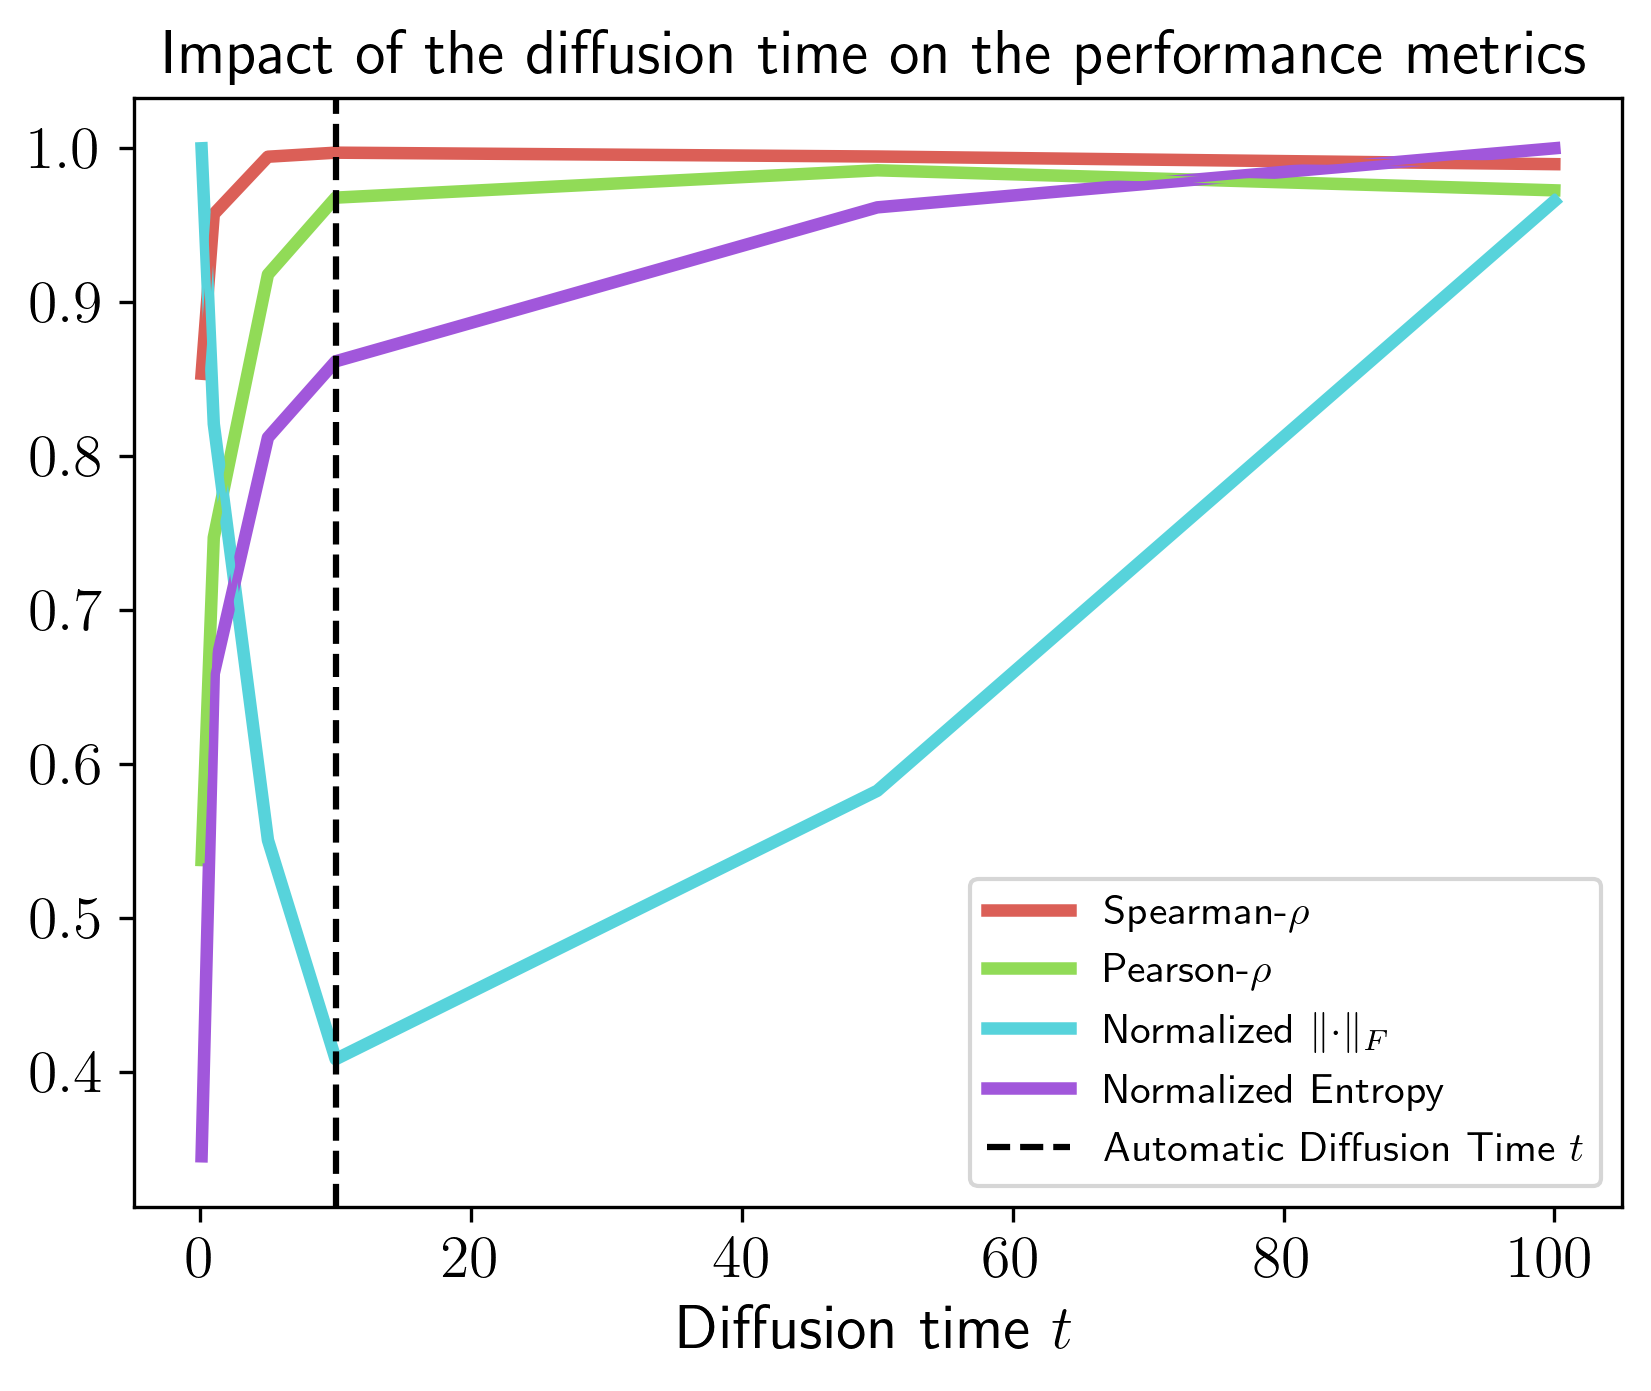

In [27]:

cp = sns.color_palette("hls",4)
cp
styles = ["-","--","-.",":"]
for i,df_ in enumerate(df):
    if i == 0:
        plt.plot(df_["Tau"],df_["SpearmanR"], label = r"Spearman-$\rho$", color = cp[0], linestyle = styles[i], linewidth = 3)
        plt.plot(df_["Tau"],df_["PearsonR"], label = r"Pearson-$\rho$", color = cp[1],linestyle = styles[i], linewidth= 3)
        plt.plot(df_["Tau"],df_["Norm Fro"] / df_["Norm Fro"].max(), label = r"Normalized $\lVert \cdot \rVert_F$", color = cp[2],linestyle = styles[i], linewidth = 3)
        plt.plot(df_["Tau"],df_["Entropy"].values/df_["Entropy"].max(), label = "Normalized Entropy", color = cp[3],linestyle = styles[i], linewidth = 3)
    plt.plot(df_["Tau"],df_["SpearmanR"], color = cp[0],linestyle = styles[i])
    plt.plot(df_["Tau"],df_["PearsonR"],  color = cp[1],linestyle = styles[i])
    plt.plot(df_["Tau"],df_["Norm Fro"] / df_["Norm Fro"].max(),  color = cp[2],linestyle = styles[i])
    plt.plot(df_["Tau"],df_["Entropy"].values/df_["Entropy"].max(),  color = cp[3],linestyle = styles[i])
    kneedle = KneeLocator(df_["Tau"], df_["Entropy"], S=0.5, curve="concave")
plt.axvline(kneedle.knee, label = r"Automatic Diffusion Time $t$", color = "black", linestyle = "--")
plt.legend()
plt.title("Impact of the diffusion time on the performance metrics", fontsize = 15)
plt.xlabel(r"Diffusion time $t$", fontsize = 15)
plt.show()

## Graph types

In [23]:
model_name = "heat_geo_graph"
run_name = "2023-04-19_13-09-31"
exp_config = get_experiment_config(model_name, run_name)
heat_geo_sweep_variables = get_sweep_variables(exp_config)
df_heat_geo = get_all_results_exp(model_name, run_name, heat_geo_sweep_variables)

model_name = "rand_geo_graph"
run_name = "2023-04-19_13-09-31"
exp_config = get_experiment_config(model_name, run_name)
rand_geo_sweep_variables = get_sweep_variables(exp_config)
df_rand_geo = get_all_results_exp(model_name, run_name, rand_geo_sweep_variables)

model_name = "heat_phate_graph"
run_name = "2023-04-19_13-09-31"
exp_config = get_experiment_config(model_name, run_name)
heat_phate_sweep_variables = get_sweep_variables(exp_config)
df_heat_phate = get_all_results_exp(model_name, run_name, heat_phate_sweep_variables)

In [27]:
heat_geo_sweep_variables

{'data': ['swiss_roll_high',
  'swiss_roll',
  'swiss_roll_very_high',
  'tree',
  'tree_high'],
 'data.manifold_noise': ['0.1', '0.5', '1', '5', '10'],
 'model.graph_type': ['knn', 'alpha', 'scanpy', 'umap'],
 'model.knn': ['10', '15'],
 'model.tau': ['0.1', '1', '5', '10', '20']}

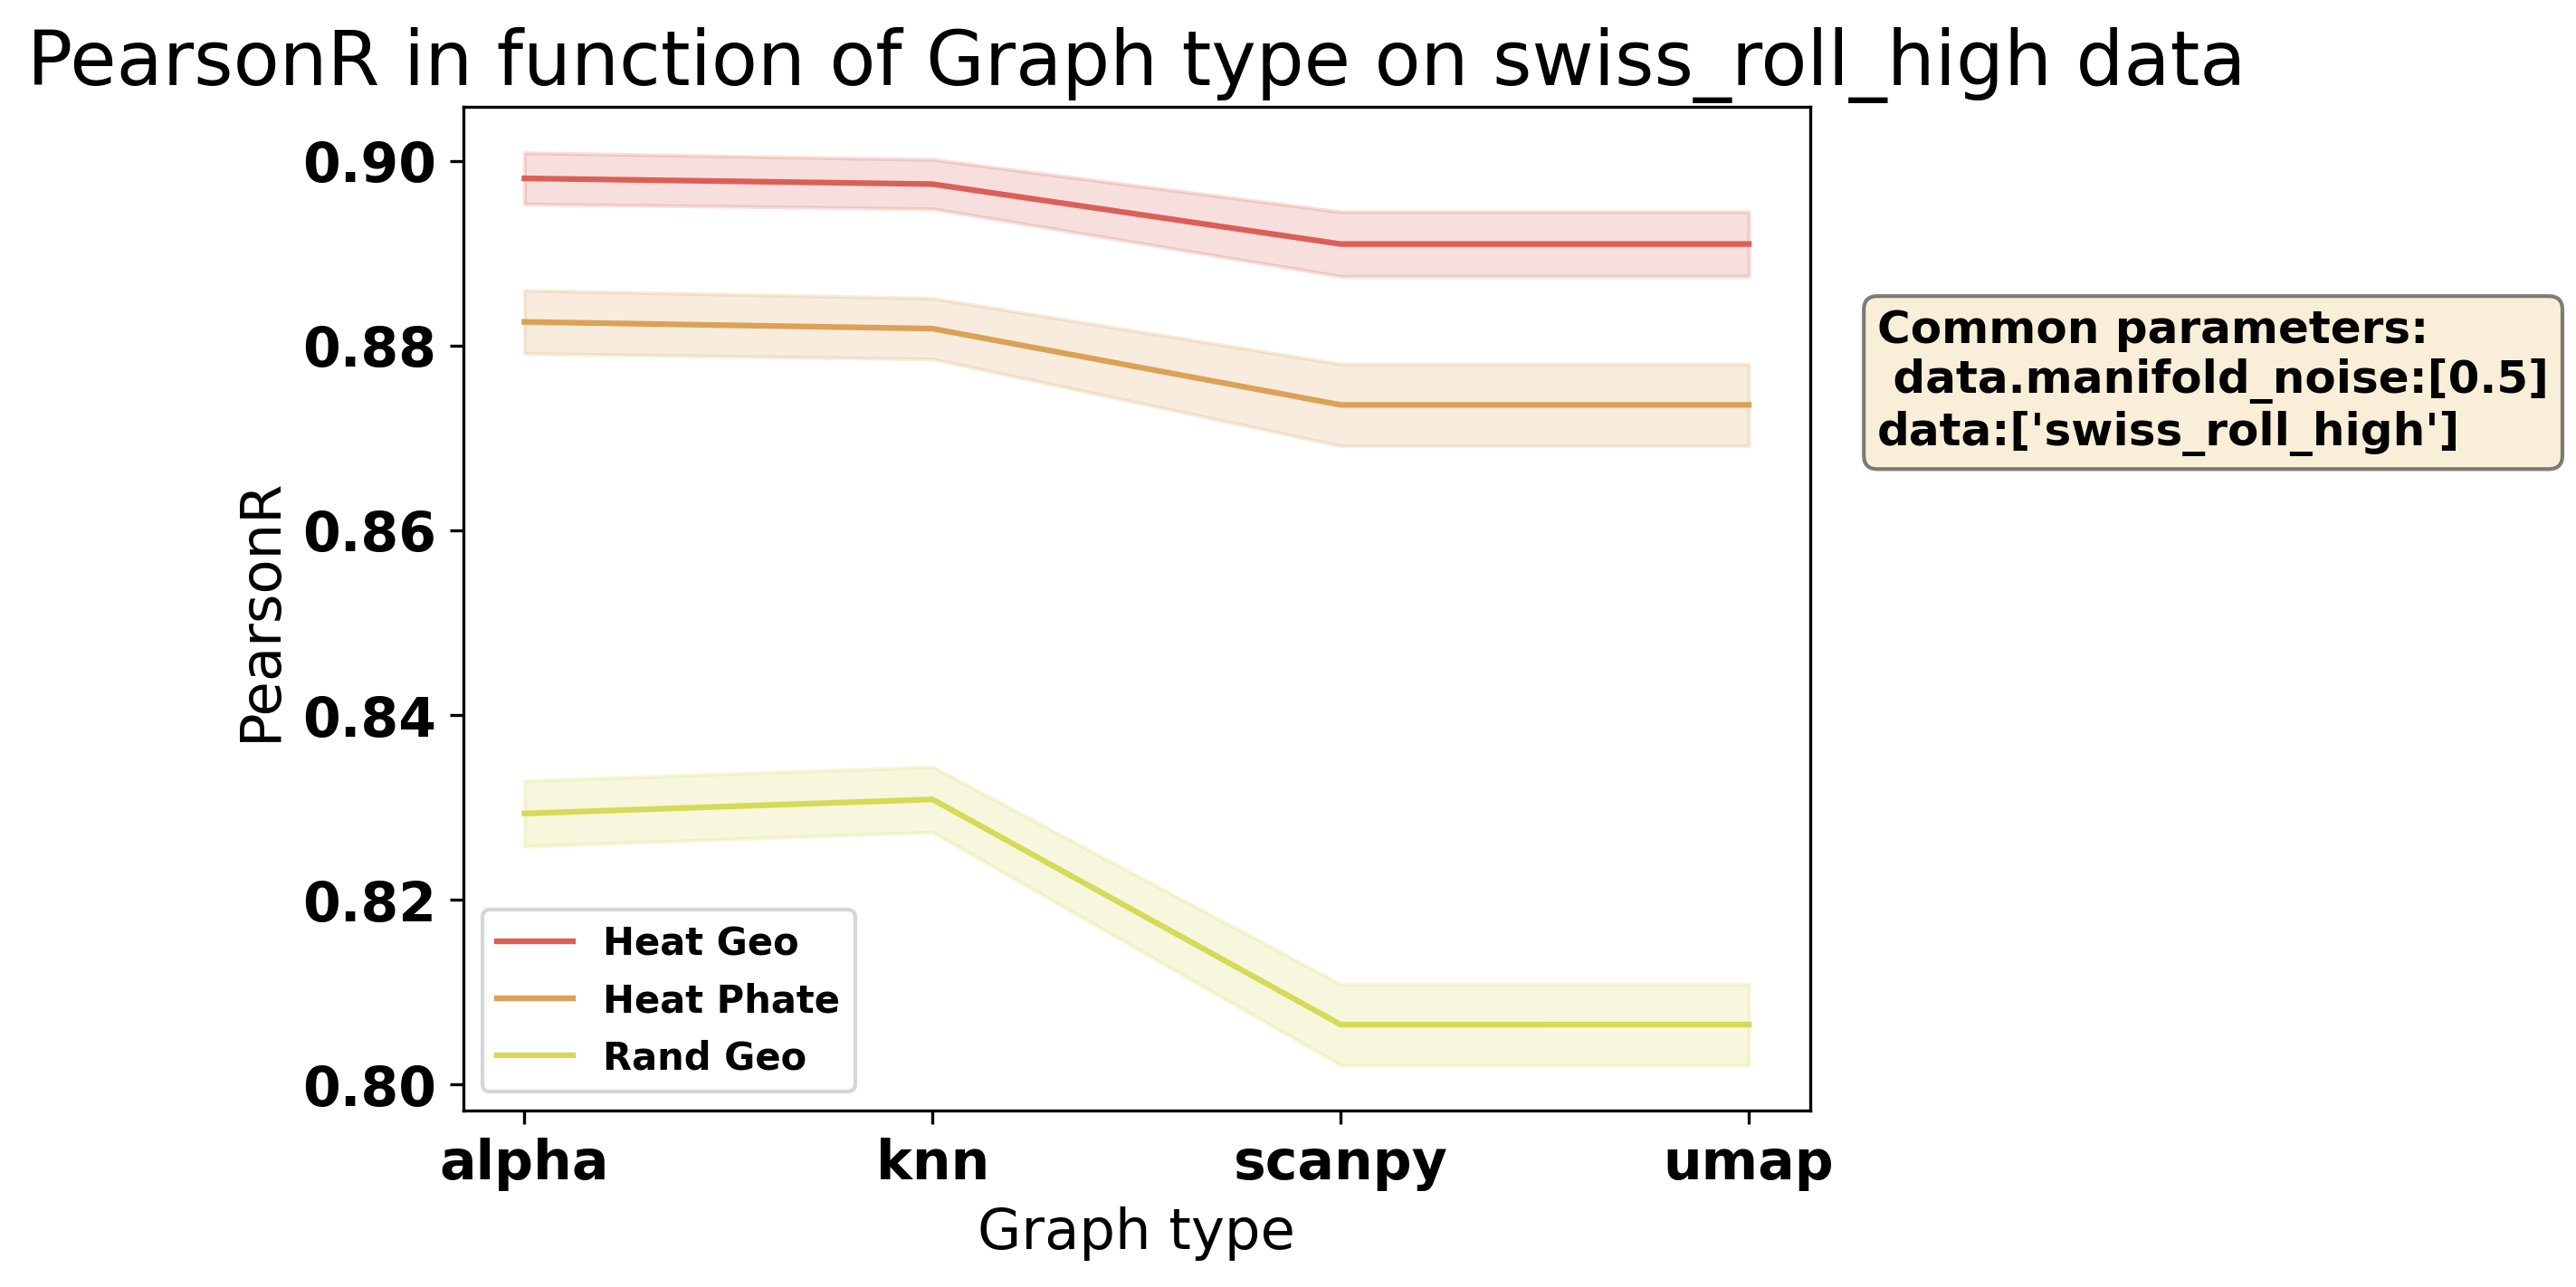

In [30]:
import matplotlib.pyplot as plt

# --------- COMMON PARAMETERS -----------
metric = "PearsonR"
xcol = "model.graph_type"
xlabel = "Graph type"
data = "swiss_roll_high"

common_constraints = {"data.manifold_noise":[0.5],
                    "data": [data]}

# ---------------------------------------

# ----------- HEAT GEO CONFIG ------------

color = cp[0]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_heat_geo
sweep_variables = heat_geo_sweep_variables

constraints = {"model.tau" : [20] ,
                "model.filter_method": ["euler"],
                "model.lap_type":["combinatorial"],
                "model.knn":[10],
                "model.order":[15],
                "model.graph_type": ["knn","alpha","scanpy", "umap"]
                }

label = "Heat Geo"

heat_geo_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------

# ------------ HEAT PHATE CONFIG ------------
color = cp[1]
no_sweep = False
df_results = df_heat_phate
sweep_variables = heat_phate_sweep_variables
constraints = {"model.tau" : [20],
                "model.filter_method": ["euler"],
                "model.lap_type":["combinatorial"],
                "model.knn":[10],
                "model.order":[15],
                "model.graph_type": ["knn","alpha","scanpy", "umap"]}

label = "Heat Phate"

heat_phate_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------


# ----------- RAND GEO CONFIG ------------

color = cp[2]
no_sweep = False #set to True if this variable was not swept over in this experiment.
df_results = df_rand_geo
sweep_variables = rand_geo_sweep_variables

constraints = {"model.tau" : [50] ,
                "model.filter_method": ["euler"],
                "model.lap_type":["combinatorial"],
                "model.knn":[10],
                "model.order":[15],
                "model.graph_type": ["knn","alpha","scanpy", "umap"]
                }

label = "Rand Geo"

rand_geo_config = {"color" : color, "constraints" : constraints, "label" : label, "no_sweep" : no_sweep, "df_results" : df_results, "sweep_variables" : sweep_variables}

# ---------------------------------------




# PLOTTING 

configs = [heat_geo_config, heat_phate_config, rand_geo_config]

fig, ax = plt.subplots()

for config in configs:

    constraints_ = {**config["constraints"], **common_constraints}

    m_df, s_df = get_results_to_plot(config["df_results"], config["sweep_variables"], constraints = constraints_, metric = metric)

    if config["no_sweep"]: # Only one measurement to plot
        ax.axhline(m_df[metric].item(), label = config["label"], color = config["color"])
        ax.axhspan(m_df[metric].item()-s_df[metric].item(),m_df[metric].item()+s_df[metric].item(), alpha= 0.2, color = config["color"])
    else:
        ax.plot(m_df[xcol],m_df[metric], label = config["label"], color = config["color"])
        ax.fill_between(m_df[xcol], m_df[metric] - s_df[metric], m_df[metric] + s_df[metric], alpha=0.2, color = config["color"])

ax.legend()
ax.set_title(f"{metric} in function of {xlabel} on {data} data", fontsize = 20)
ax.set_xlabel(xlabel, fontsize = 15)
ax.set_ylabel(metric, fontsize = 15)

textstr = "\n".join([f"{k}:{v}" for k,v in common_constraints.items()])
textstr = "Common parameters: \n " + textstr
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(1.05, 0.8, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
plt.show() 

## Clustering

In [33]:
model_name = "heat_geo_clustering"
run_name =  "2023-05-15_18-50-48" #"2023-05-09_23-25-17" 
exp_config = get_experiment_config(model_name, run_name)
heat_geo_sweep_variables = get_sweep_variables(exp_config)
df_heat_geo = get_all_results_exp(model_name, run_name, heat_geo_sweep_variables)

model_name = "phate_clustering"
run_name = "2023-05-15_16-41-15" #"2023-05-09_23-25-17" 
exp_config = get_experiment_config(model_name, run_name)
phate_sweep_variables = get_sweep_variables(exp_config)
df_phate = get_all_results_exp(model_name, run_name, phate_sweep_variables)

model_name = "umap_clustering"
run_name = "2023-05-15_16-48-57" #"2023-05-09_23-25-17"
exp_config = get_experiment_config(model_name, run_name)
umap_sweep_variables = get_sweep_variables(exp_config)
df_umap = get_all_results_exp(model_name, run_name, umap_sweep_variables)

model_name = "tsne_clustering"
run_name = "2023-05-15_16-42-36" #"2023-05-09_23-25-18" 
exp_config = get_experiment_config(model_name, run_name)
tsne_sweep_variables = get_sweep_variables(exp_config)
df_tsne = get_all_results_exp(model_name, run_name, tsne_sweep_variables)

model_name = "diff_map_clustering"
run_name = "2023-05-15_19-38-32" #"2023-05-09_23-25-18" 
exp_config = get_experiment_config(model_name, run_name)
diff_map_sweep_variables = get_sweep_variables(exp_config)
df_diff_map = get_all_results_exp(model_name, run_name, diff_map_sweep_variables)

In [34]:
for df,sweep_var in [(df_heat_geo,heat_geo_sweep_variables), (df_phate,phate_sweep_variables), (df_umap,umap_sweep_variables), (df_tsne,tsne_sweep_variables), (df_diff_map, diff_map_sweep_variables)]:
    if "data.manifold_noise" not in df.columns:
        df["data.manifold_noise"] = 0
        sweep_var["data.manifold_noise"] = ["0"]
    df.loc[df.data=='${data.data_file}','data'] = 'multi_cite'

In [35]:
df_diff_map

Method Seed  Accuracy (t)  Rand Score (t)  Adjusted Rand Score (t)  \
0   diff_map   42      0.796970        0.864059                 0.664372   
1   diff_map   43      0.818182        0.866308                 0.658344   
2   diff_map   44      0.784848        0.866818                 0.667648   
3   diff_map   45      0.781818        0.850793                 0.639323   
4   diff_map   46      0.787879        0.859608                 0.656193   
..       ...  ...           ...             ...                      ...   
5   diff_map   47      0.868182        0.897411                 0.746456   
6   diff_map   48      0.743939        0.840516                 0.644937   
7   diff_map   49      0.780303        0.859323                 0.669447   
8   diff_map   50      0.777273        0.858610                 0.666163   
9   diff_map   51      0.718182        0.812563                 0.552576   

    Homogeneity  Completeness  V-measure  Adjusted Rand Score  \
0      0.616838      0.542883   0.577502             0.523485   
1      0.627150      0.546099   0.583825             0.537233   
2      0.600301      0.531535   0.563829             0.531879   
3      0.597648      0.504597   0.547195             0.491266   
4      0.600780      0.516025   0.555186             0.509620   
..          ...           ...        ...                  ...   
5      0.559869      0.579029   0.569288             0.485737   
6      0.584123      0.567793   0.575842             0.496932   
7      0.549204      0.529364   0.539101             0.428684   
8      0.549550      0.539091   0.544270             0.409746   
9      0.544594      0.549597   0.547084             0.430458   

    Adjusted Mutual Info Score  Silhouette Score   time(s)  \
0                     0.576397          0.601532  7.456527   
1                     0.582746          0.579863  7.681359   
2                     0.562688          0.619704  6.786941   
3                     0.546012          0.592439  6.019894   
4                     0.554020          0.602721  7.775002   
..                         ...               ...       ...   
5                     0.568087          0.706663  7.533286   
6                     0.574544          0.714057  7.622972   
7                     0.537801          0.703913  7.288978   
8                     0.542988          0.698640  7.580858   
9                     0.545799          0.743909  7.533353   

                    data  data.manifold_noise  model.knn  model.tau  
0   swiss_roll_very_high                  1.0         15          5  
1   swiss_roll_very_high                  1.0         15          5  
2   swiss_roll_very_high                  1.0         15          5  
3   swiss_roll_very_high                  1.0         15          5  
4   swiss_roll_very_high                  1.0         15          5  
..                   ...                  ...        ...        ...  
5   swiss_roll_very_high                  0.5         15          5  
6   swiss_roll_very_high                  0.5         15          5  
7   swiss_roll_very_high                  0.5         15          5  
8   swiss_roll_very_high                  0.5         15          5  
9   swiss_roll_very_high                  0.5         15          5  

[960 rows x 16 columns]

In [36]:
metrics = [("Homogeneity",max),("Adjusted Rand Score",max),("Adjusted Mutual Info Score",max),("time(s)",min)]
#metrics = [("Norm Fro N2",min)]

df_res_metrics = []
df_hp_dict = {}
for metric, best_order in metrics:
    df_list = []
    df_hp_dict[metric] = {}

    for df, sweep_variables, method_name in [(df_heat_geo, heat_geo_sweep_variables, "Heat-Geo"),
                                            (df_diff_map, diff_map_sweep_variables, "Diff-Map"),
                                            (df_umap, umap_sweep_variables, "UMAP"),
                                            (df_tsne, tsne_sweep_variables, "TSNE"),
                                            (df_phate, phate_sweep_variables, "Phate")]:
        best_df, best_with_hp = get_best_results_test(df,metric, sweep_variables, best_order) #best with hp is the val error with hyper-parameters
        best_df["Method"] = method_name
        df_list.append(best_df[["data","data.manifold_noise","Method",metric]])
        df_hp_dict[metric][method_name] = best_with_hp

    df_res = pd.concat(df_list).copy()
    df_res = df_res.reset_index(drop = True)

    ### Bold the best results :

    df_res["mean"] = df_res[metric].apply(lambda x: float(x.split(" \pm ")[0][1:]))

    idx = df_res.groupby(["data","data.manifold_noise"])["mean"].transform(best_order) == df_res["mean"]

    for i,id in zip(list(idx.index),list(idx.values)):
        if id:
            df_res.loc[i,metric] = "$\mathbf{" + df_res.loc[i,metric][1:-1] + "}$"

    df_res = df_res.drop(columns = ["mean"])


    # Append the results for this metric 
    df_res_metrics.append(df_res)

from functools import reduce 
df_all_metrics = reduce(lambda x,y : pd.merge(x,y, on = ["Method","data","data.manifold_noise"]),df_res_metrics)
df_all_metrics.sort_values(by = ["data","data.manifold_noise","Method"],inplace=True)


df_all_metrics.rename(columns = {"data.manifold_noise":"Noise level"}, inplace = True)
df_all_metrics["data"] = df_all_metrics["data"].apply(lambda x: x.replace("_"," ").capitalize())

df_all_metrics = df_all_metrics.reset_index(drop = True)

In [37]:
df_latex = df_all_metrics.to_latex(escape = False, index = False)

split_every_n = 5
for split_idx in range(len(df_all_metrics)// split_every_n):
    df_latex = add_hline(df_latex, split_every_n*(split_idx+1) + split_idx)

print(df_latex)

\begin{tabular}{lrlllll}
\toprule
                data &  Noise level &   Method &                Homogeneity &        Adjusted Rand Score & Adjusted Mutual Info Score &                     time(s) \\
\midrule
               Mnist &          0.0 & Heat-Geo &            $0.785 \pm 0.0$ &            $0.695 \pm 0.0$ &          $0.829 \pm 0.001$ &           $3.091 \pm 0.089$ \\
               Mnist &          0.0 &    Phate &           $0.822 \pm 0.01$ &           $0.72 \pm 0.017$ &          $0.835 \pm 0.011$ &   $\mathbf{0.93 \pm 0.005}$ \\
               Mnist &          0.0 &     TSNE & $\mathbf{0.903 \pm 0.003}$ & $\mathbf{0.871 \pm 0.002}$ & $\mathbf{0.902 \pm 0.003}$ &          $14.994 \pm 0.395$ \\
               Mnist &          0.0 &     UMAP &          $0.851 \pm 0.016$ &          $0.846 \pm 0.005$ &           $0.86 \pm 0.015$ &           $2.418 \pm 0.076$ \\
                Pbmc &          0.0 & Heat-Geo &          $0.734 \pm 0.009$ &          $0.724 \pm 0.019$ &          $0.768

## Sweep Figures 

In [1]:
from src.dataset import SwissRoll
from src.sc_dataset import IPSC, EBData, PBMC
from src.knn_methods import KNNClassifier
from src.embedding import new_HeatGeo, DiffusionMap
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

ModuleNotFoundError: No module named 'src'

In [42]:
ds = PBMC(n_points = 1300, random_state = 42)
data, labels = ds.X, ds.labels

In [ ]:
model = new_HeatGeo(tau = "auto", order = 30, n_pca = None, knn=5, filter_method = "euler", lap_type = "combinatorial", log_normalize = False,emb_dim=2, harnack_regul = 0.5)# mds_weights_type="heat_kernel", scale_factor=2)  

emb = model.fit_transform(data)

#KMeans Clustering
n_clusters = len(np.unique(labels))

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [71]:
model = DiffusionMap(tau=5,knn=5 , decay = 35 ,emb_dim=2)
emb = model.fit_transform(data)

#KMeans Clustering
n_clusters = len(np.unique(labels))

kmeans = KMeans(n_clusters=n_clusters, random_state=42)


Text(0.5, 1.0, 'Diffusion map embed')

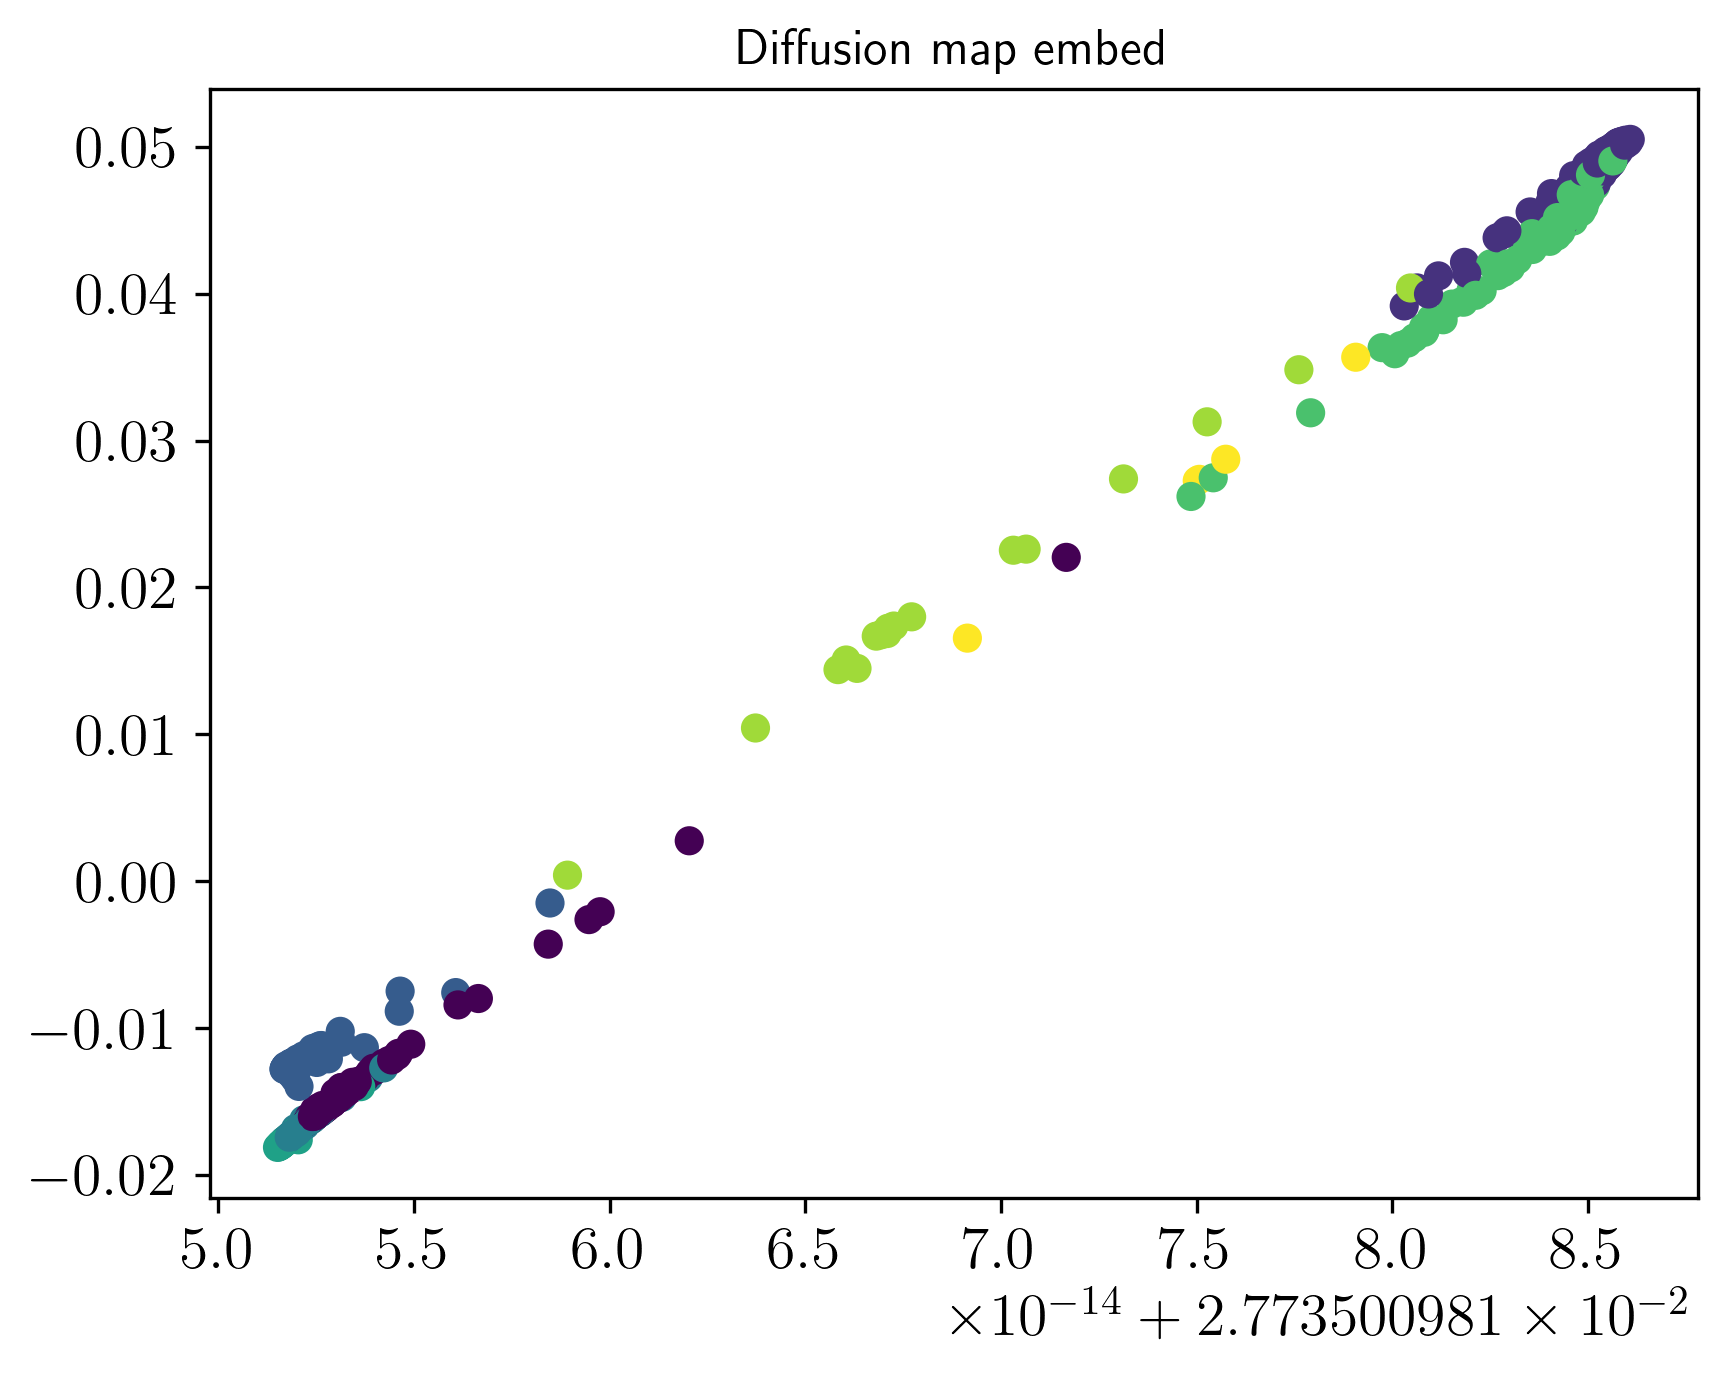

In [72]:
plt.scatter(emb[:,0],emb[:,1], c = labels)
plt.title("Diffusion map embed")

/gpfs/gibbs/project/krishnaswamy_smita/ed667/conda_envs/metric_embedding/lib/python3.10/site-packages/graphtools/graphs.py:122: UserWarning: Building a kNNGraph on data of shape (1300, 1838) is expensive. Consider setting n_pca.
  warnings.warn(


Optimal tau:  [22.26666667]
Using s_gd2 for MDS. None


Text(0.5, 1.0, 'Heat Geo embed')

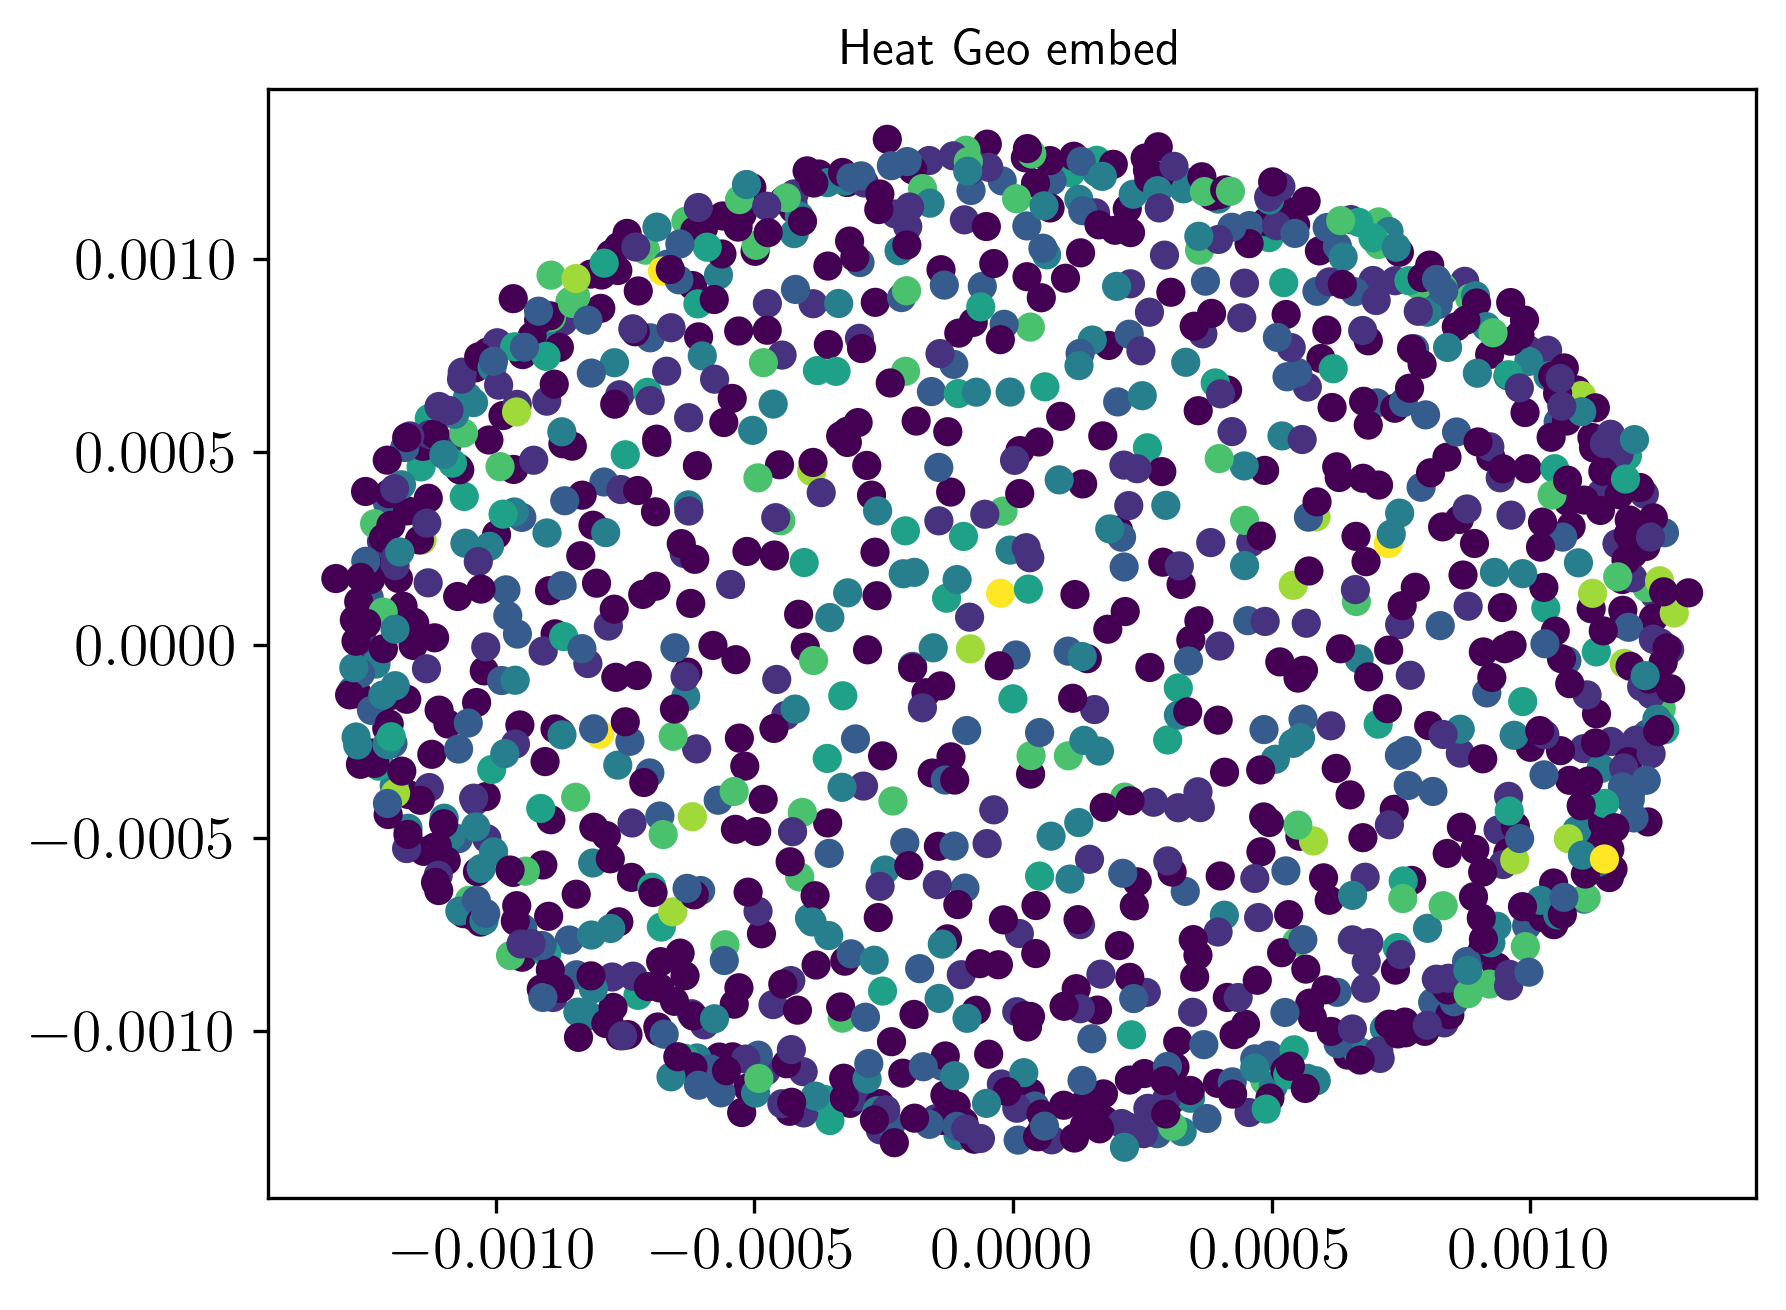

In [46]:
model = new_HeatGeo(tau = "auto", order = 30, n_pca = None, knn=5, filter_method = "euler", lap_type = "combinatorial", log_normalize = False,emb_dim=2, harnack_regul = 0.5)# mds_weights_type="heat_kernel", scale_factor=2)  

emb = model.fit_transform(data)

#KMeans Clustering
n_clusters = len(np.unique(labels))

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [32]:
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

estimator = make_pipeline(StandardScaler(), kmeans).fit(emb)

/gpfs/gibbs/project/krishnaswamy_smita/ed667/conda_envs/metric_embedding/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
from sklearn.metrics import homogeneity_score
homogeneity_score(labels,estimator.predict(emb))

0.006485170358296744

Text(0.5, 1.0, 'Clustering on top of the Heat Geo embedding')

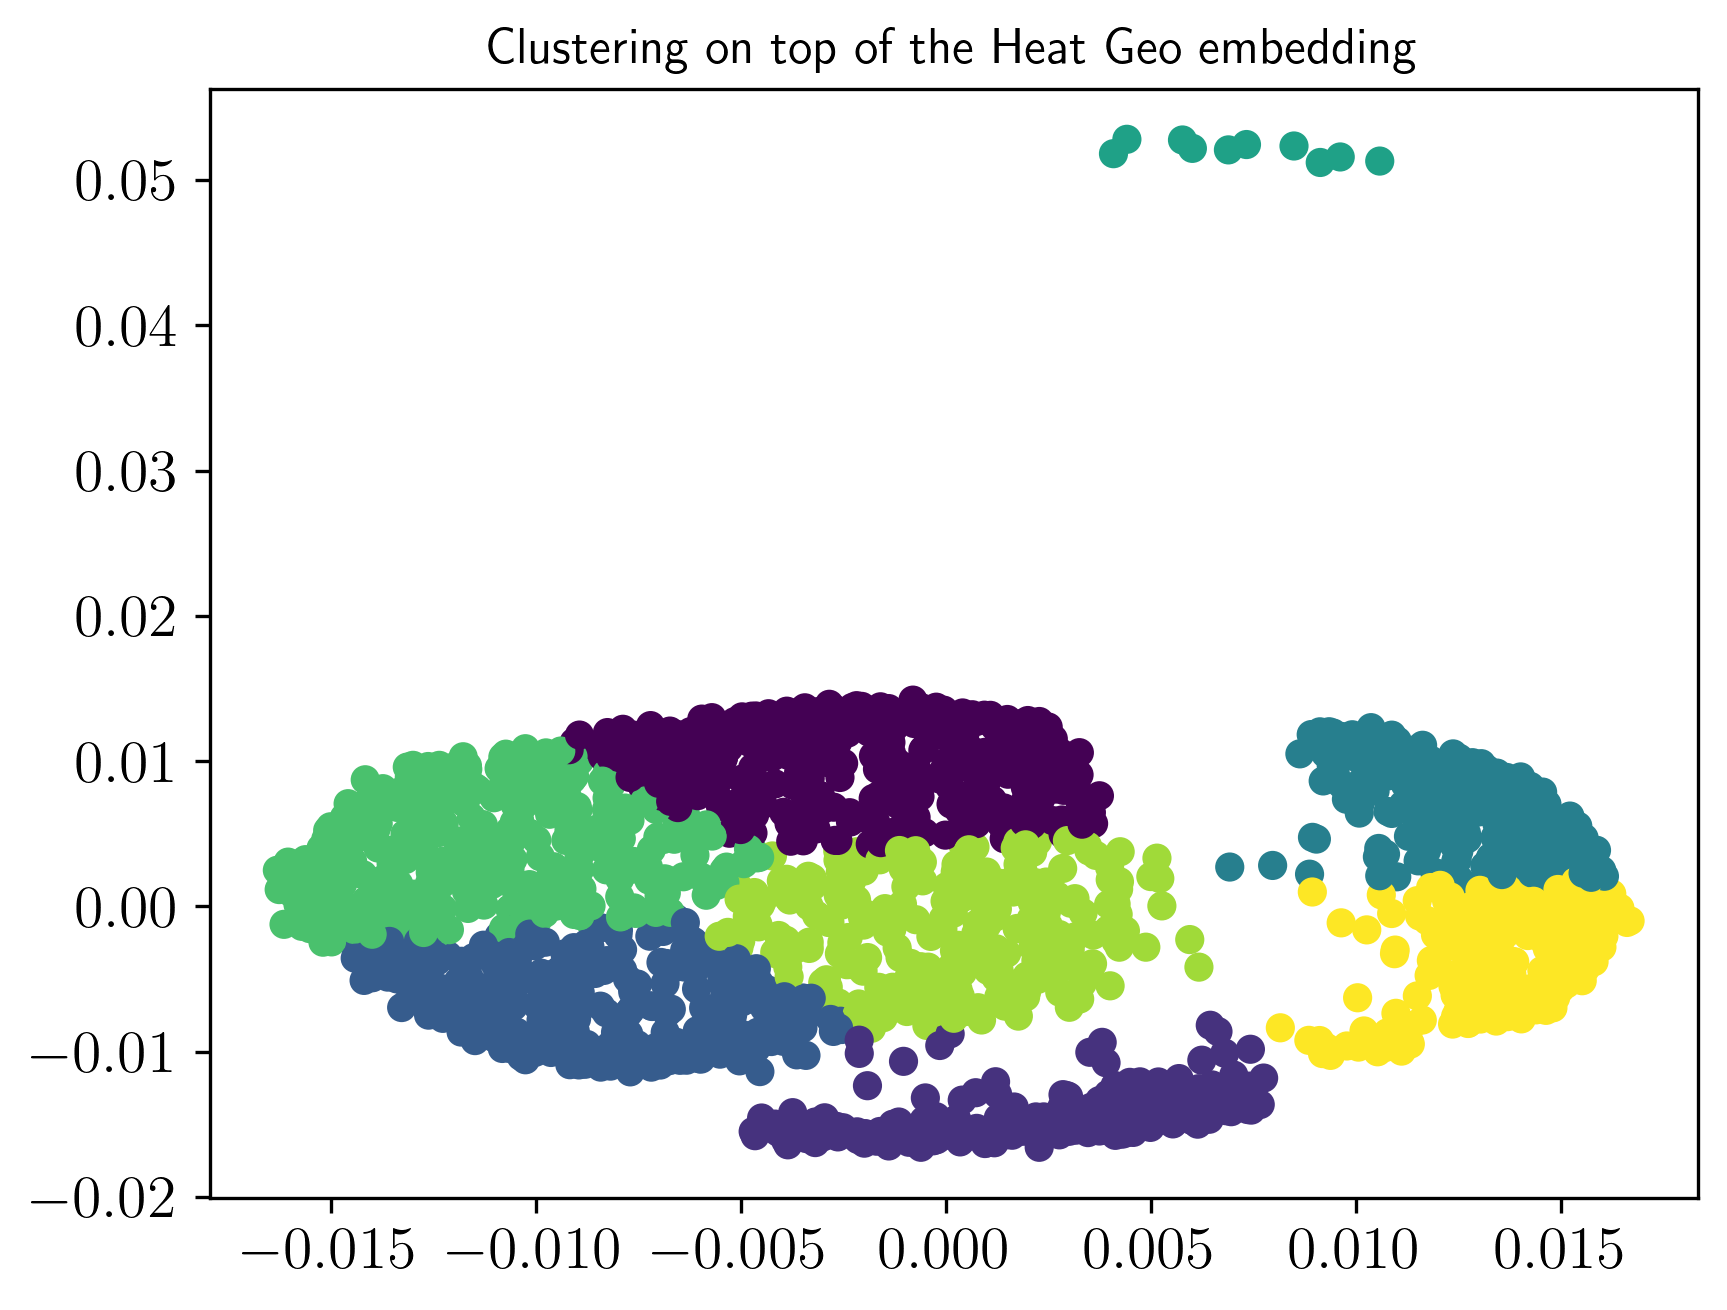

In [21]:
plt.scatter(emb[:,0],emb[:,1], c = estimator.predict(emb))
plt.title("Clustering on top of the Heat Geo embedding")

Text(0.5, 1.0, 'Heat Geo embed')

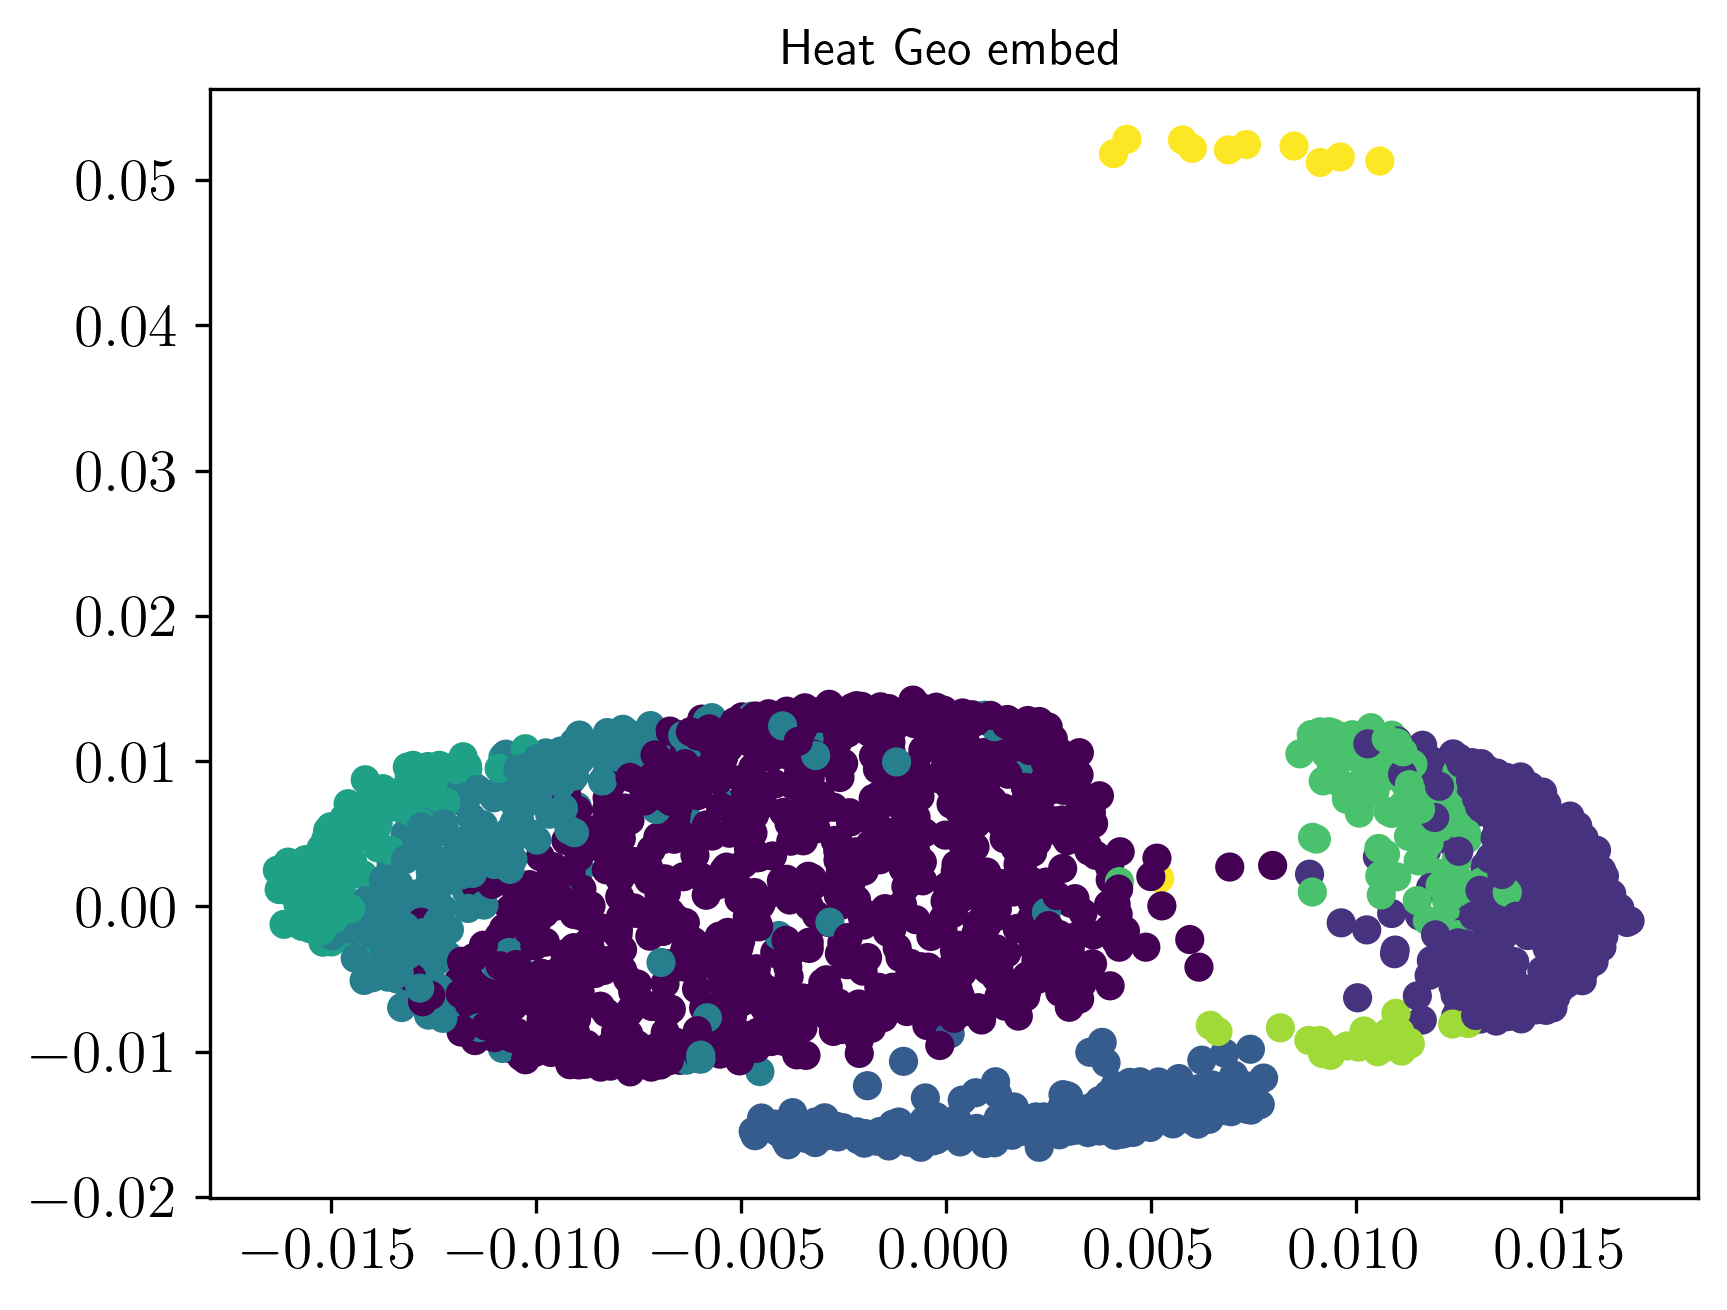

In [22]:
plt.scatter(emb[:,0],emb[:,1], c = labels)
plt.title("Heat Geo embed")

In [32]:
import umap
model = umap.UMAP(n_neighbors = 100, min_dist = 0.1)

emb = model.fit_transform(data)

Text(0.5, 1.0, 'UMAP embed')

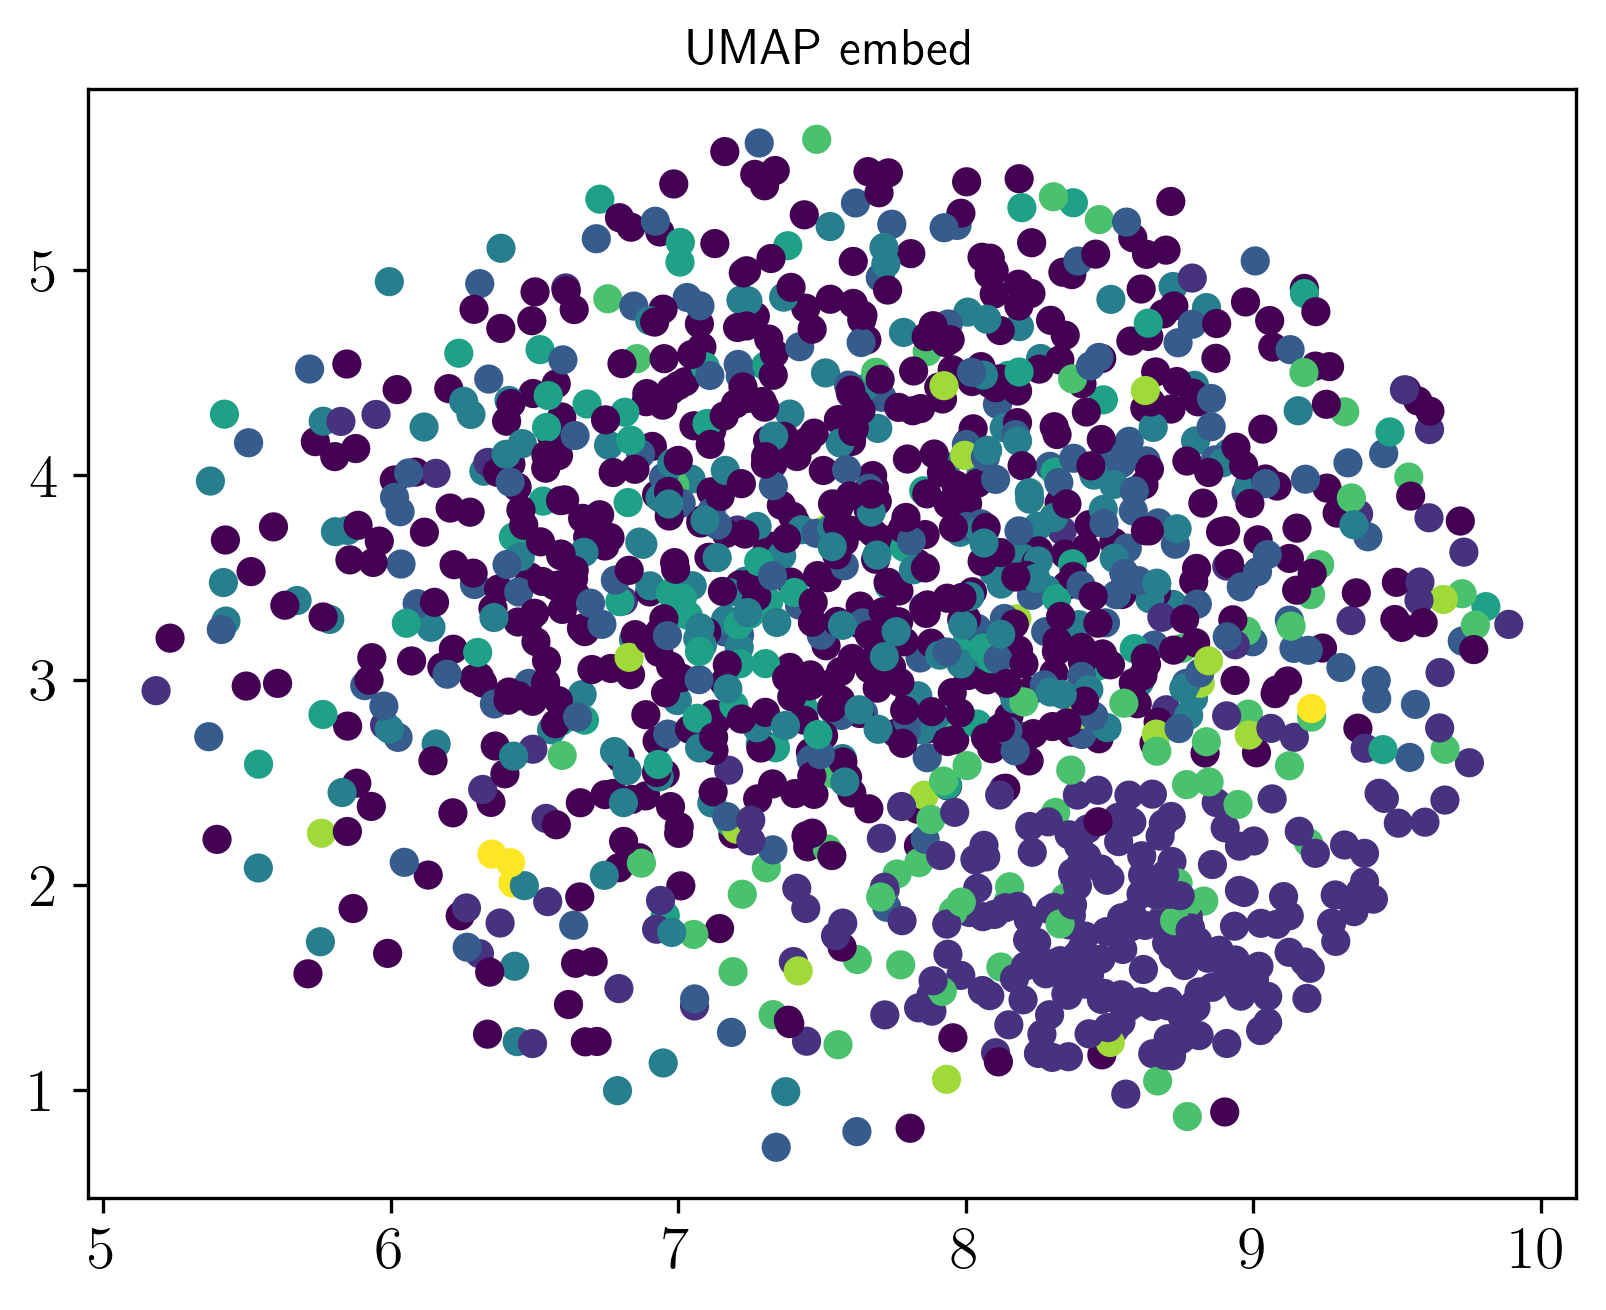

In [33]:
plt.scatter(emb[:,0],emb[:,1], c = labels)
plt.title("UMAP embed")

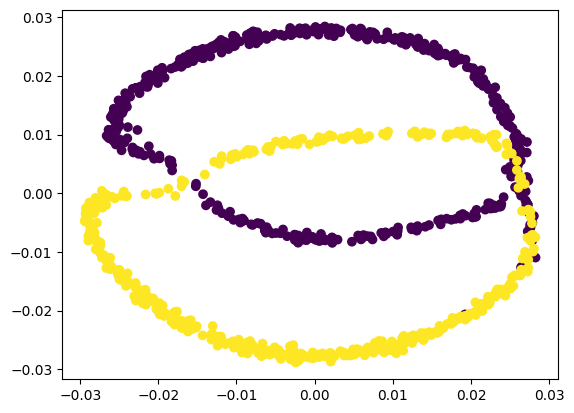

In [19]:
plt.scatter(embeds[:,0],embeds[:,1], c = ds.clusters)

/home/ed667/project/conda_envs/metric_embedding/lib/python3.10/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


<Axes3D: >

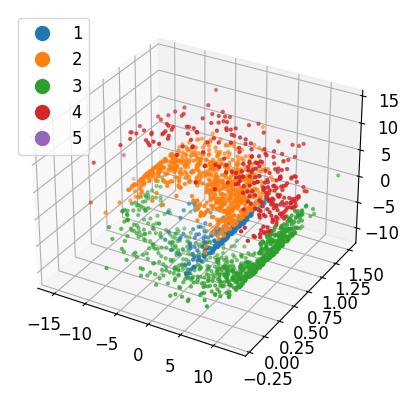

In [6]:
import scprep
scprep.plot.scatter3d(ds.X, c= )

In [61]:
import pandas as pd
pd.read_pickle("../logs/experiments/runs/default/2023-04-19_12-31-16/final_swiss_roll_high_rand_geo_symmetric_0.pkl")

Method Seed # group  SpearmanR  PearsonR     P@5     P@10  \
0  rand_geo_symmetric   42    2000   0.377198  0.386195  0.3601  0.40540   
1  rand_geo_symmetric   43    2000   0.376305  0.384808  0.3572  0.39630   
2  rand_geo_symmetric   44    2000   0.377676  0.386225  0.3542  0.39760   
3  rand_geo_symmetric   45    2000   0.379660  0.387523  0.3595  0.39925   
4  rand_geo_symmetric   46    2000   0.376950  0.386201  0.3496  0.39470   
5  rand_geo_symmetric   47    2000   0.377611  0.386449  0.3655  0.40050   
6  rand_geo_symmetric   48    2000   0.377101  0.386362  0.3498  0.40130   
7  rand_geo_symmetric   49    2000   0.373568  0.381809  0.3534  0.39695   
8  rand_geo_symmetric   50    2000   0.378163  0.385669  0.3511  0.39260   
9  rand_geo_symmetric   51    2000   0.375119  0.384207  0.3658  0.40515   

       P@20      P@30      P@40     P@50  Norm Fro  Norm inf  Norm Fro N2  \
0  0.425675  0.436700  0.445325  0.45005  5.100675  4.095477     0.011211   
1  0.415425  0.428800  0.435200  0.44263  5.165890  4.080286     0.011230   
2  0.415225  0.428367  0.442038  0.44656  5.158809  4.103103     0.011229   
3  0.426700  0.440000  0.447738  0.45405  5.157153  4.135406     0.011228   
4  0.413525  0.427617  0.439375  0.44590  5.123307  4.088232     0.011218   
5  0.418950  0.431700  0.441500  0.44914  5.126020  4.057609     0.011217   
6  0.423500  0.437717  0.445713  0.45188  5.177529  4.120453     0.011236   
7  0.409225  0.423700  0.433638  0.44217  5.165771  4.127986     0.011238   
8  0.418925  0.433883  0.444775  0.45083  5.181425  4.117460     0.011236   
9  0.420100  0.432633  0.439538  0.44619  5.088751  4.050474     0.011209   

   Norm inf N2   time(s)  
0     0.011547  5.763968  
1     0.011559  5.727852  
2     0.011567  5.748233  
3     0.011601  5.752876  
4     0.011543  5.660948  
5     0.011580  6.221555  
6     0.011582  6.274595  
7     0.011580  6.185463  
8     0.011586  6.215035  
9     0.011544  6.314897

In [2]:
import numpy as np
import scprep
from src.embedding import RandWalkGeo, new_HeatGeo, BaseEmb
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
import phate
from src.filter_approx import Heat_filter

In [3]:
def plot2d(embed):
    fig, axes = plt.subplots(1, 2, figsize=(10,5))
    scprep.plot.scatter2d(embed, c=t, ax=axes[0])
    scprep.plot.scatter2d(embed, c=x[:,1], ax=axes[1])

In [4]:
np.random.seed(42)
x, t = make_swiss_roll(2000)
x[:,1] *= 3 # width of the swiss roll.
ground_truth = np.stack([x[:, 1], t], axis=1)

/home/ed667/project/conda_envs/metric_embedding/lib/python3.10/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


<Axes3D: >

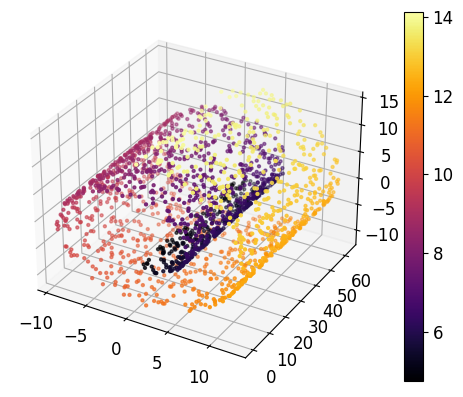

In [5]:
scprep.plot.scatter3d(x, c=t)

In [30]:
import numpy as np
np.random.seed(420)
n_points = 2000
width = 1
t = 3 * np.pi / 2 * (1 + 2 * np.random.rand(1, n_points))
h = width * np.random.rand(1, n_points)


t_ = np.stack((7+ 1. * np.random.normal(size = int(n_points/2)),
    12 + 1.*np.random.normal(size = int(n_points/2)))) 
h_ = h
#mv = np.concatenate((np.random.multivariate_normal(mean = [7,0.5],cov = [[1.5,0],[0,0.05]],size = int(n_points/2)),
#    np.random.multivariate_normal(mean = [12,0.5],cov = [[1.5,0],[0,0.05]],size = int(n_points/2))))

#t_ = mv[:,0]
#h_ = mv[:,1]

In [7]:
mv.shape

(2000, 2)

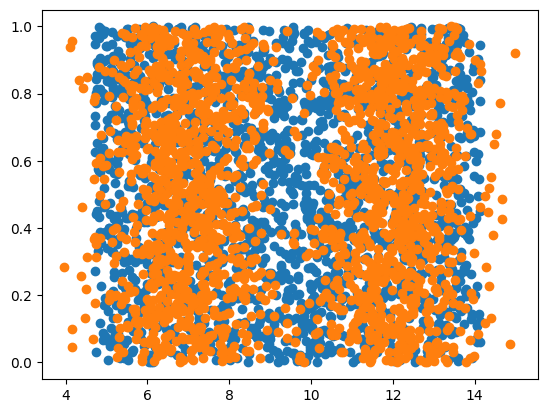

In [31]:
plt.scatter(t,h)
plt.scatter(t_,h_)

In [5]:
np.random.seed(421)
n_points = 2000
width = 1
rotate_dim = None

t = 3 * np.pi / 2 * (1 + 2 * np.random.rand(1, n_points))
tp = np.arcsinh(t)
h = width * np.random.rand(1, n_points)

data = np.concatenate(
(t * np.cos(t), h, t * np.sin(t))) 

data_p = np.concatenate(
(tp * np.cos(tp), h, tp * np.sin(tp)))

X = data.T
Xp = data_p.T

   

In [13]:
from sklearn.metrics import pairwise_distances

def _unroll_t(t):
        t = t.flatten()
        return 0.5 * ((np.sqrt(t**2 + 1) * t) + np.arcsinh(t)).reshape(1, -1)

true_coords = np.concatenate((_unroll_t(t), h)).T
geodesic_dist = pairwise_distances(true_coords, metric="euclidean")

true_coords_p = np.concatenate((t, h)).T
geodesic_dist_p = pairwise_distances(true_coords_p, metric="euclidean")

In [19]:
((geodesic_dist_p - geodesic_dist)**2).mean()

1061.0641399723659

In [15]:
geodesic_dist

array([[ 0.        , 13.36978285, 48.7662628 , ...,  9.82755854,
        43.3078181 , 36.11493178],
       [13.36978285,  0.        , 62.12217121, ..., 23.19457391,
        56.66494866, 49.47404813],
       [48.7662628 , 62.12217121,  0.        , ..., 38.94120698,
         5.45897527, 12.65284753],
       ...,
       [ 9.82755854, 23.19457391, 38.94120698, ...,  0.        ,
        33.4824374 , 26.28899488],
       [43.3078181 , 56.66494866,  5.45897527, ..., 33.4824374 ,
         0.        ,  7.19387242],
       [36.11493178, 49.47404813, 12.65284753, ..., 26.28899488,
         7.19387242,  0.        ]])

/home/ed667/project/conda_envs/metric_embedding/lib/python3.10/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


<Axes3D: >

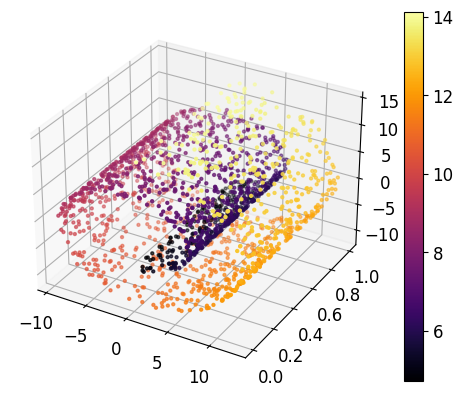

In [20]:
scprep.plot.scatter3d(data.T,c = t.flatten())

/home/ed667/project/conda_envs/metric_embedding/lib/python3.10/site-packages/scprep/plot/utils.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


<Axes3D: >

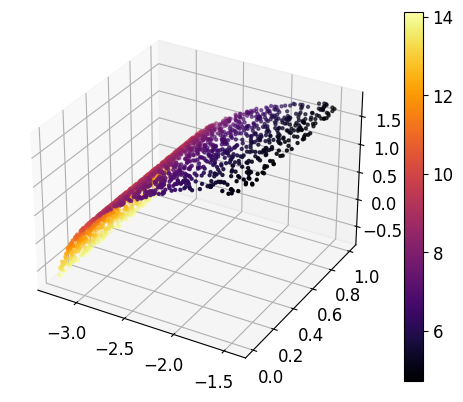

In [10]:
scprep.plot.scatter3d(data_p.T,c = t.flatten())

/home/ed667/project/conda_envs/metric_embedding/lib/python3.11/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


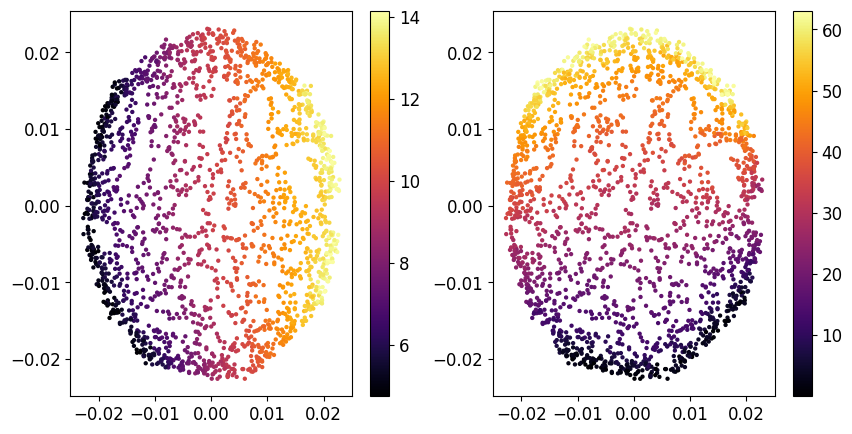

In [13]:
# exact random walk Pt
knn = 5
tau = 2
emb_op = new_HeatGeo(knn=knn, tau=tau, decay = 100, n_ref = 1, n_svd= 0)
emb = emb_op.fit_transform(x)
plot2d(emb)

In [4]:
import numpy as np
import scprep
from src.embedding import RandWalkGeo, new_HeatGeo, BaseEmb
import matplotlib.pyplot as plt
from sklearn.datasets import make_swiss_roll
import phate
from src.filter_approx import Heat_filter
from src.graph import get_knn_graph, get_alpha_decay_graph, get_scanpy_graph, get_umap_graph

In [15]:
np.random.seed(42)
x, t = make_swiss_roll(200)
x[:,1] *= 3 # width of the swiss roll.
ground_truth = np.stack([x[:, 1], t], axis=1)

In [16]:
alpha_graph = get_alpha_decay_graph(x)

In [18]:
K = alpha_graph.build_kernel()


In [54]:
from graphtools.graphs import TraditionalGraph
from graphtools.api import Graph
from pygsp.graphs import Graph as pygspGraph
from graphtools.matrix import set_diagonal

In [22]:
other_graph = Graph(data = K, precomputed = "affinity")

In [33]:
alpha_graph.compute_laplacian(lap_type="combinatorial")
pgraph = alpha_graph.to_pygsp()

In [57]:
set_diagonal(pgraph.W, 1)[32,32]

1.0

In [52]:
(pgraph._build_weight_from_kernel(pgraph.K) != pgraph.W).sum()

0

In [58]:
(alpha_graph.K != alpha_graph.kernel).sum()

0

In [34]:
pgraph.compute_laplacian(lap_type="combinatorial")

In [38]:
(pgraph.L != alpha_graph.L).sum()

24

In [41]:
(pgraph.L-alpha_graph.L)[(pgraph.L != alpha_graph.L)]

matrix([[-7.03911880e-05,  7.03911880e-05, -5.19541124e-05,
          5.19541124e-05, -5.94676568e-05,  5.94676568e-05,
         -8.45128967e-05,  8.45128967e-05, -7.13907128e-05,
          7.13907128e-05,  5.94676568e-05, -5.94676568e-05,
          7.13907128e-05, -7.13907128e-05,  8.45128967e-05,
         -8.45128967e-05, -5.02202243e-05,  5.02202243e-05,
          5.02202243e-05, -5.02202243e-05,  5.19541124e-05,
         -5.19541124e-05,  7.03911880e-05, -7.03911880e-05]])

6.607083189127955

In [1]:
from src.embedding import ShortestPath, new_HeatGeo
from src.dataset import SwissRoll
from src.knn_methods import evaluate

In [30]:
ds = SwissRoll(n_points=200, manifold_noise = 0.5, width=5, rotate_dim = 3)

In [31]:
data, labels = ds.X, ds.labels
ground_dist = ds.get_geodesic()

In [32]:
model = ShortestPath(knn=10)
model.fit(data)
model.metric_computation(data)

In [33]:
evaluate(model.dist, ground_dist, ks=[5])

(0.6941874371859298,
 0.6797236872693745,
 0.407,
 4.893742668365802,
 4.642291101283116,
 0.1084453883812047,
 0.1285035894737127)

In [34]:
model = ShortestPath(knn=20)
model.fit(data)
model.metric_computation(data)

In [35]:
evaluate(model.dist, ground_dist, ks=[5])

(0.28288658966474167,
 0.2621347449040078,
 0.407,
 2.832637913903811,
 2.72307391149204,
 0.0627712856056661,
 0.07537760222150482)

In [48]:
model = new_HeatGeo(knn=15,tau=0.1, harnack_regul=1)
model.fit(data)
model.metric_computation(data)
evaluate(model.dist, ground_dist, ks=[5])

/gpfs/gibbs/project/krishnaswamy_smita/ed667/conda_envs/metric_embedding/lib/python3.10/site-packages/graphtools/base.py:165: RuntimeWarning: Cannot perform PCA to 40 dimensions on data with min(n_samples, n_features) = 3
  warnings.warn(


(0.3944486012150305,
 0.44433584336091897,
 0.33,
 0.4760017326259545,
 0.5158740165196719,
 0.010548203341060809,
 0.014279945266826629)

In [49]:
model.dist

array([[0.        , 2.5512025 , 3.83483048, ..., 3.18413138, 3.33347024,
        3.83483052],
       [2.5512025 , 0.        , 3.83483192, ..., 2.02853751, 2.32243625,
        3.37317461],
       [3.83483048, 3.83483192, 0.        , ..., 3.26927449, 3.05739257,
        1.96473142],
       ...,
       [3.18413138, 2.02853751, 3.26927449, ..., 0.        , 1.44513275,
        2.71405647],
       [3.33347024, 2.32243625, 3.05739257, ..., 1.44513275, 0.        ,
        2.48662291],
       [3.83483052, 3.37317461, 1.96473142, ..., 2.71405647, 2.48662291,
        0.        ]])

In [8]:
import pandas as pd

In [1]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y = True)

In [5]:
X.shape

(1797, 64)